In [228]:
from datetime import datetime
start_time = datetime.now()

# Libraries to install
# %pip install pandas-profiling

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#from copy import deecopy

print('LOAD DURATION: ', datetime.now() - start_time) # load time about 30 seconds

LOAD DURATION:  0:00:00.009008


In [2]:
%%time
data = pd.read_csv('NY property data.csv')

Wall time: 21.1 s


In [3]:
data.shape

(1070994, 32)

In [4]:
data.head()

,RECORD,BBLE,BORO,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,...,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE
0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500,...,0,0,3775500.0,8613000.0,3775500.0,8613000.0,NaN,FINAL,2010/11,AC-TR
1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27,...,0,0,11111400.0,80690400.0,11111400.0,80690400.0,NaN,FINAL,2010/11,AC-TR
2,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709,...,709,564,32321790.0,40179510.0,32321790.0,40179510.0,NaN,FINAL,2010/11,AC-TR
3,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793,...,85,551,13644000.0,15750000.0,13644000.0,15750000.0,NaN,FINAL,2010/11,AC-TR
4,5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323,...,89,57,106348680.0,107758350.0,106348680.0,107758350.0,NaN,FINAL,2010/11,AC-TR


In [5]:
data.tail()

,RECORD,BBLE,BORO,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,...,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE
1070989,1070990,5080500083,5,8050,83,NaN,"TOBIN, GALE",A1,1,60,...,30,26,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR
1070990,1070991,5080500086,5,8050,86,NaN,SHERRI MILINAZZO,A1,1,62,...,32,26,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR
1070991,1070992,5080500089,5,8050,89,NaN,JOHN GERVASI,A1,1,53,...,24,32,NaN,NaN,NaN,NaN,1017.0,FINAL,2010/11,AC-TR
1070992,1070993,5080500092,5,8050,92,NaN,RITA M MOOG,A1,1,52,...,32,21,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR
1070993,1070994,5080500094,5,8050,94,NaN,EDWARD DONOHUE,A1,1,50,...,30,24,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR


In [6]:
numrecords = len(data)
print(numrecords)

1070994


In [7]:
# %%time
# import pandas_profiling
# data.profile_report(correlations={"cramers": {"calculate": False}})
# profile = pandas_profiling.ProfileReport(data)
# profile.to_file('NY stats.html')

In [8]:
data.dtypes

RECORD        int64
BBLE         object
BORO          int64
BLOCK         int64
LOT           int64
EASEMENT     object
OWNER        object
BLDGCL       object
TAXCLASS     object
LTFRONT       int64
LTDEPTH       int64
EXT          object
STORIES     float64
FULLVAL     float64
AVLAND      float64
AVTOT       float64
EXLAND      float64
EXTOT       float64
EXCD1       float64
STADDR       object
ZIP         float64
EXMPTCL      object
BLDFRONT      int64
BLDDEPTH      int64
AVLAND2     float64
AVTOT2      float64
EXLAND2     float64
EXTOT2      float64
EXCD2       float64
PERIOD       object
YEAR         object
VALTYPE      object
dtype: object

In [9]:
data.head().transpose()

,0,1,2,3,4
RECORD,1,2,3,4,5
BBLE,1000010101,1000010201,1000020001,1000020023,1000030001
BORO,1,1,1,1,1
BLOCK,1,1,2,2,3
LOT,101,201,1,23,1
EASEMENT,NaN,NaN,NaN,NaN,NaN
OWNER,U S GOVT LAND & BLDGS,U S GOVT LAND & BLDGS,DEPT OF GENERAL SERVI,DEPARTMENT OF BUSINES,PARKS AND RECREATION
BLDGCL,P7,Z9,Y7,T2,Q1
TAXCLASS,4,4,4,4,4
LTFRONT,500,27,709,793,323


In [10]:
data.tail().transpose()

,1070989,1070990,1070991,1070992,1070993
RECORD,1070990,1070991,1070992,1070993,1070994
BBLE,5080500083,5080500086,5080500089,5080500092,5080500094
BORO,5,5,5,5,5
BLOCK,8050,8050,8050,8050,8050
LOT,83,86,89,92,94
EASEMENT,NaN,NaN,NaN,NaN,NaN
OWNER,"TOBIN, GALE",SHERRI MILINAZZO,JOHN GERVASI,RITA M MOOG,EDWARD DONOHUE
BLDGCL,A1,A1,A1,A1,A1
TAXCLASS,1,1,1,1,1
LTFRONT,60,62,53,52,50


In [11]:
data.count()

RECORD      1070994
BBLE        1070994
BORO        1070994
BLOCK       1070994
LOT         1070994
EASEMENT       4636
OWNER       1039249
BLDGCL      1070994
TAXCLASS    1070994
LTFRONT     1070994
LTDEPTH     1070994
EXT          354305
STORIES     1014730
FULLVAL     1070994
AVLAND      1070994
AVTOT       1070994
EXLAND      1070994
EXTOT       1070994
EXCD1        638488
STADDR      1070318
ZIP         1041104
EXMPTCL       15579
BLDFRONT    1070994
BLDDEPTH    1070994
AVLAND2      282726
AVTOT2       282732
EXLAND2       87449
EXTOT2       130828
EXCD2         92948
PERIOD      1070994
YEAR        1070994
VALTYPE     1070994
dtype: int64

In [12]:
df1 = data.loc[:,data.dtypes != object]
df1

,RECORD,BORO,BLOCK,LOT,LTFRONT,LTDEPTH,STORIES,FULLVAL,AVLAND,AVTOT,...,EXTOT,EXCD1,ZIP,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2
0,1,1,1,101,500,1046,NaN,21400000.0,4225500.0,9630000.0,...,9630000.0,4600.0,10004.0,0,0,3775500.0,8613000.0,3775500.0,8613000.0,NaN
1,2,1,1,201,27,0,NaN,193800000.0,14310000.0,87210000.0,...,87210000.0,4600.0,10004.0,0,0,11111400.0,80690400.0,11111400.0,80690400.0,NaN
2,3,1,2,1,709,564,3.0,104686000.0,39008700.0,47108700.0,...,47108700.0,2191.0,10004.0,709,564,32321790.0,40179510.0,32321790.0,40179510.0,NaN
3,4,1,2,23,793,551,2.0,39200000.0,15255000.0,17640000.0,...,17640000.0,2191.0,10004.0,85,551,13644000.0,15750000.0,13644000.0,15750000.0,NaN
4,5,1,3,1,323,1260,1.0,272300000.0,121050000.0,122535000.0,...,122535000.0,2231.0,10004.0,89,57,106348680.0,107758350.0,106348680.0,107758350.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070989,1070990,5,8050,83,60,120,2.5,438000.0,14536.0,23322.0,...,1620.0,1017.0,10307.0,30,26,NaN,NaN,NaN,NaN,NaN
1070990,1070991,5,8050,86,62,228,2.5,544000.0,9303.0,14929.0,...,1620.0,1017.0,10307.0,32,26,NaN,NaN,NaN,NaN,NaN
1070991,1070992,5,8050,89,53,273,2.0,480000.0,14790.0,22975.0,...,14728.0,1015.0,10307.0,24,32,NaN,NaN,NaN,NaN,1017.0
1070992,1070993,5,8050,92,52,136,2.0,543000.0,12388.0,23037.0,...,1620.0,1017.0,10307.0,32,21,NaN,NaN,NaN,NaN,NaN


In [13]:
df1.columns

Index(['RECORD', 'BORO', 'BLOCK', 'LOT', 'LTFRONT', 'LTDEPTH', 'STORIES',
       'FULLVAL', 'AVLAND', 'AVTOT', 'EXLAND', 'EXTOT', 'EXCD1', 'ZIP',
       'BLDFRONT', 'BLDDEPTH', 'AVLAND2', 'AVTOT2', 'EXLAND2', 'EXTOT2',
       'EXCD2'],
      dtype='object')

In [14]:
df1.count()

RECORD      1070994
BORO        1070994
BLOCK       1070994
LOT         1070994
LTFRONT     1070994
LTDEPTH     1070994
STORIES     1014730
FULLVAL     1070994
AVLAND      1070994
AVTOT       1070994
EXLAND      1070994
EXTOT       1070994
EXCD1        638488
ZIP         1041104
BLDFRONT    1070994
BLDDEPTH    1070994
AVLAND2      282726
AVTOT2       282732
EXLAND2       87449
EXTOT2       130828
EXCD2         92948
dtype: int64

In [15]:
df1.dtypes

RECORD        int64
BORO          int64
BLOCK         int64
LOT           int64
LTFRONT       int64
LTDEPTH       int64
STORIES     float64
FULLVAL     float64
AVLAND      float64
AVTOT       float64
EXLAND      float64
EXTOT       float64
EXCD1       float64
ZIP         float64
BLDFRONT      int64
BLDDEPTH      int64
AVLAND2     float64
AVTOT2      float64
EXLAND2     float64
EXTOT2      float64
EXCD2       float64
dtype: object

In [16]:
df1["RECORD"] = df1["RECORD"].astype(float)
df1["BORO"] = df1["BORO"].astype(float)
df1["BLOCK"] = df1["BLOCK"].astype(float)
df1["LOT"] = df1["LOT"].astype(float)
df1["LTFRONT"] = df1["LTFRONT"].astype(float)
df1["LTDEPTH"] = df1["LTDEPTH"].astype(float)
df1["BLDFRONT"] = df1["BLDFRONT"].astype(float)
df1["BLDDEPTH"] = df1["BLDDEPTH"].astype(float)

<ipython-input-16-4c5d4ca17be1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["RECORD"] = df1["RECORD"].astype(float)
<ipython-input-16-4c5d4ca17be1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["BORO"] = df1["BORO"].astype(float)
<ipython-input-16-4c5d4ca17be1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [17]:
df1.describe()

,RECORD,BORO,BLOCK,LOT,LTFRONT,LTDEPTH,STORIES,FULLVAL,AVLAND,AVTOT,...,EXTOT,EXCD1,ZIP,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2
count,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.014730e+06,1.070994e+06,1.070994e+06,1.070994e+06,...,1.070994e+06,638488.000000,1.041104e+06,1.070994e+06,1.070994e+06,2.827260e+05,2.827320e+05,8.744900e+04,1.308280e+05,92948.000000
mean,5.354975e+05,3.215427e+00,4.757239e+03,3.647221e+02,3.663530e+01,8.886159e+01,5.006918e+00,8.742645e+05,8.506792e+04,2.272382e+05,...,9.118698e+04,1602.014232,1.092396e+04,2.304277e+01,3.992284e+01,2.462357e+05,7.139114e+05,3.512357e+05,6.567683e+05,1364.041679
std,3.091695e+05,1.201197e+00,3.676579e+03,8.532152e+02,7.403284e+01,7.639628e+01,8.365707e+00,1.158243e+07,4.057260e+06,6.877529e+06,...,6.508403e+06,1384.226741,5.284208e+02,3.557970e+01,4.270715e+01,6.178963e+06,1.165253e+07,1.080221e+07,1.607251e+07,1094.705653
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,1010.000000,1.000100e+04,0.000000e+00,0.000000e+00,3.000000e+00,3.000000e+00,1.000000e+00,7.000000e+00,1011.000000
25%,2.677492e+05,3.000000e+00,1.555000e+03,2.300000e+01,1.900000e+01,8.000000e+01,2.000000e+00,3.040000e+05,9.180000e+03,1.837400e+04,...,0.000000e+00,1017.000000,1.031400e+04,1.500000e+01,2.600000e+01,5.705000e+03,3.391200e+04,2.090000e+03,2.870000e+03,1017.000000
50%,5.354975e+05,3.000000e+00,4.047000e+03,4.900000e+01,2.500000e+01,1.000000e+02,2.000000e+00,4.470000e+05,1.367800e+04,2.534000e+04,...,1.620000e+03,1017.000000,1.121400e+04,2.000000e+01,3.900000e+01,2.014500e+04,7.996250e+04,3.048000e+03,3.706200e+04,1017.000000
75%,8.032458e+05,4.000000e+00,6.898000e+03,1.430000e+02,4.000000e+01,1.000000e+02,3.000000e+00,6.190000e+05,1.974000e+04,4.543800e+04,...,2.090000e+03,1017.000000,1.136400e+04,2.400000e+01,5.000000e+01,6.264000e+04,2.405510e+05,3.177900e+04,1.068408e+05,1017.000000
max,1.070994e+06,5.000000e+00,1.635000e+04,9.978000e+03,9.999000e+03,9.999000e+03,1.190000e+02,6.150000e+09,2.668500e+09,4.668309e+09,...,4.668309e+09,7170.000000,3.380300e+04,7.575000e+03,9.393000e+03,2.371005e+09,4.501180e+09,2.371005e+09,4.501180e+09,7160.000000


In [18]:
df1["EXTOT2"].describe().apply(lambda x: '%.5f' % x)

count        130828.00000
mean         656768.28190
std        16072510.17205
min               7.00000
25%            2870.00000
50%           37062.00000
75%          106840.75000
max      4501180002.00000
Name: EXTOT2, dtype: object

In [19]:
((df1["EXTOT2"] == 0).sum().sum() / 1070994) * 100

0.0

### explore each field 

In [20]:
plt.rcParams.update({'figure.figsize':(12,6)})
plt.rcParams.update({'font.size':20})

In [21]:
len(data['RECORD'].unique())

1070994

In [22]:
len(data['RECORD'])

1070994

<AxesSubplot:>

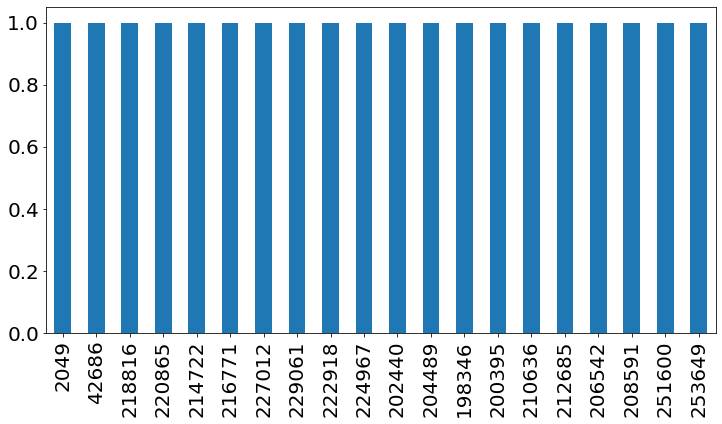

In [23]:
data['RECORD'].value_counts().head(20).plot(kind='bar')

In [24]:
len(data['BBLE'].unique())

1070994

<AxesSubplot:>

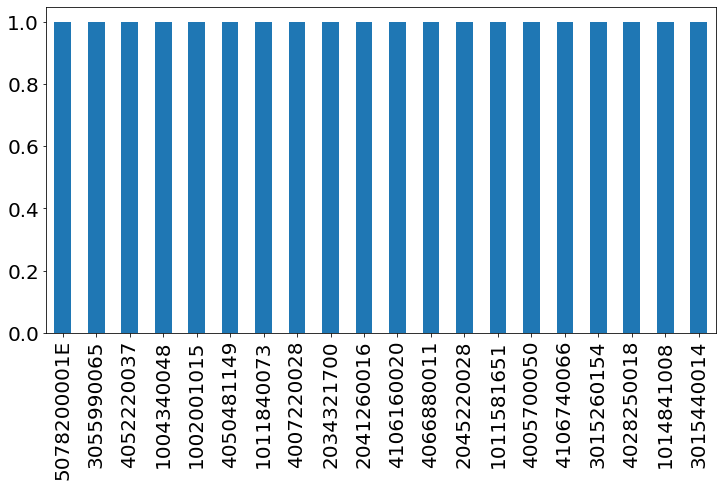

In [25]:
data['BBLE'].value_counts().head(20).plot(kind='bar')

In [26]:
len(data['BORO'].unique())

5

In [27]:
data['BORO'].count() * 100 / numrecords

100.0

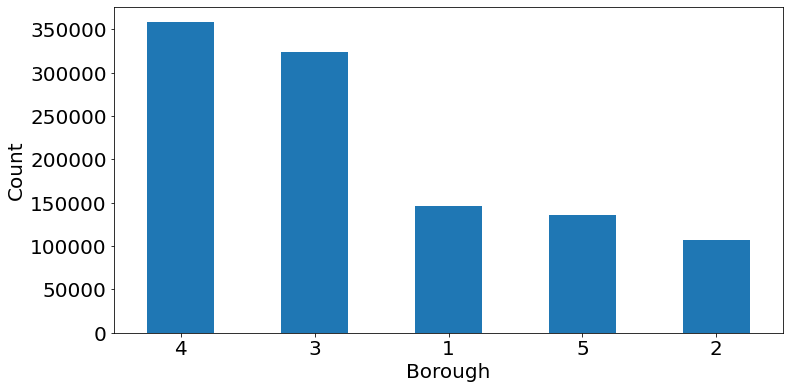

In [28]:
data['BORO'].value_counts().head(20).plot(kind='bar')
plt.xlabel("Borough")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.savefig('plot')

In [29]:
data['BLOCK'].count() * 100 / numrecords

100.0

In [30]:
len(data['BLOCK'].unique())

13984

In [31]:
data['BLOCK'].min()

1

Text(0, 0.5, 'Count')

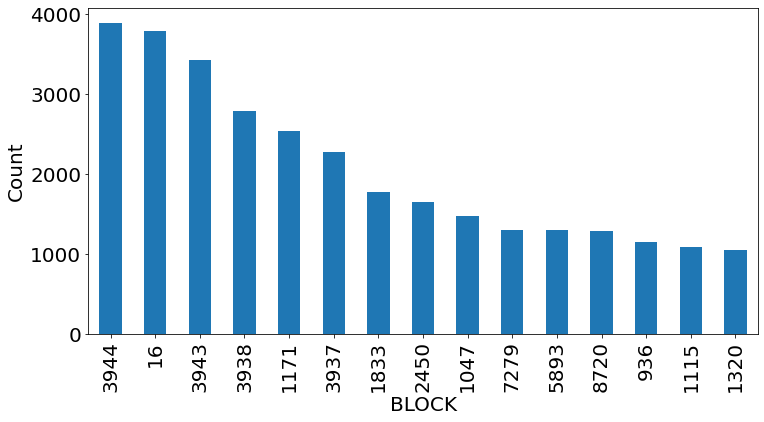

In [32]:
data['BLOCK'].value_counts().head(15).plot(kind='bar')
plt.xlabel("BLOCK")
plt.ylabel("Count")

In [33]:
data['LOT'].count() * 100 / numrecords

100.0

In [34]:
len(data['LOT'].unique())

6366

In [35]:
data['LOT'].value_counts()

1       24367
20      12294
15      12171
12      12143
14      12074
        ...  
5403        1
8036        1
4965        1
8037        1
4887        1
Name: LOT, Length: 6366, dtype: int64

In [36]:
data['LOT'].min()

1

In [37]:
data['LOT'].value_counts().head(20)#.plot(kind='bar')
#plt.xticks(rotation=0)

1     24367
20    12294
15    12171
12    12143
14    12074
16    12042
17    11982
18    11979
25    11949
21    11840
23    11705
22    11665
6     11646
19    11640
30    11596
24    11591
26    11584
28    11369
29    11357
7     11340
Name: LOT, dtype: int64

In [38]:
data['EASEMENT'].count() * 100 / numrecords

0.4328689049611856

In [39]:
len(data['EASEMENT'].unique())

13

In [40]:
data['EASEMENT'].value_counts()

E    4148
F     296
G     102
H      33
N      19
I      16
J       8
K       5
P       3
L       3
M       2
U       1
Name: EASEMENT, dtype: int64

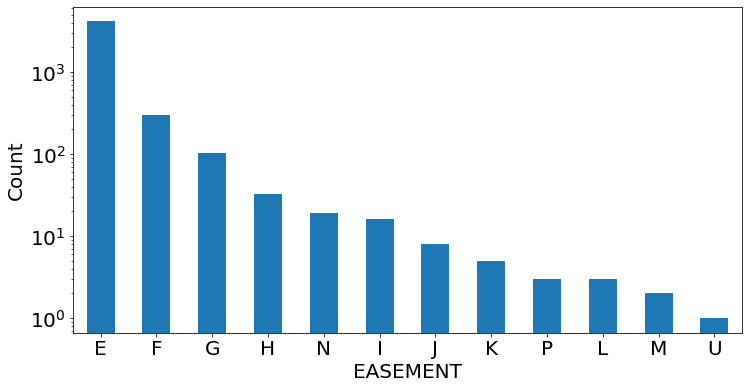

In [41]:
plt.yscale('log')
data['EASEMENT'].value_counts().head(20).plot(kind='bar')
plt.xlabel("EASEMENT")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.savefig('plot.png')

Text(0, 0.5, 'Count')

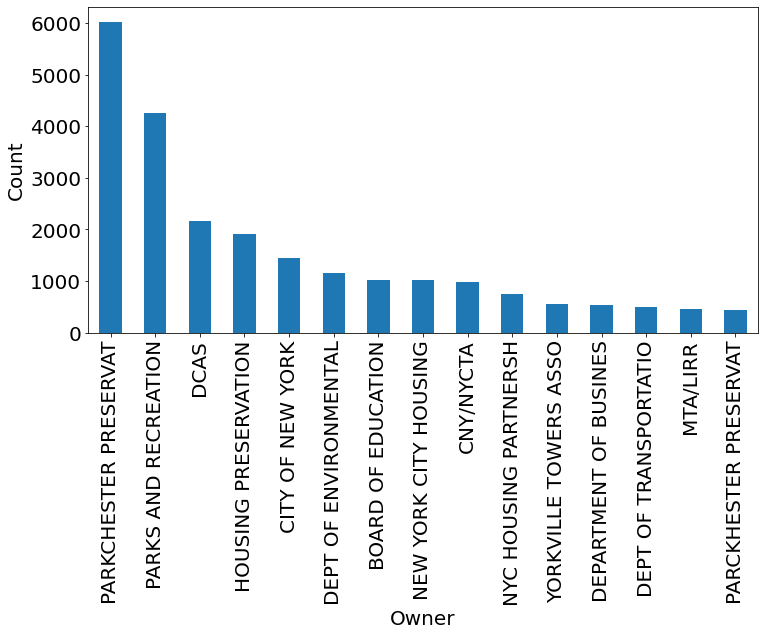

In [42]:
data['OWNER'].value_counts().head(15).plot(kind='bar')
plt.xlabel("Owner")
plt.ylabel("Count")

In [43]:
data['OWNER'].count() * 100 / numrecords

97.03593110699033

In [44]:
len(data['OWNER'].unique())

863348

In [45]:
data['OWNER'].value_counts()

PARKCHESTER PRESERVAT    6021
PARKS AND RECREATION     4255
DCAS                     2169
HOUSING PRESERVATION     1904
CITY OF NEW YORK         1450
                         ... 
SHMIDOFF, JULIA             1
AYYAD FADWA                 1
JOE RODEO DEVELOPERS        1
QUILES, ERICA               1
LEVY, EDMOND                1
Name: OWNER, Length: 863347, dtype: int64

In [46]:
len(data['BLDGCL'].unique())

200

In [47]:
data['BLDGCL'].count() * 100 / numrecords

100.0

In [48]:
data['BLDGCL'].value_counts()

R4    139879
A1    123369
A5     96984
B1     84208
B2     77598
       ...  
I3         4
I2         4
H7         3
E6         1
Y5         1
Name: BLDGCL, Length: 200, dtype: int64

In [49]:
data[data['BLDGCL'] == 0]

,RECORD,BBLE,BORO,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,...,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'R4'),
  Text(1, 0, 'A1'),
  Text(2, 0, 'A5'),
  Text(3, 0, 'B1'),
  Text(4, 0, 'B2'),
  Text(5, 0, 'C0'),
  Text(6, 0, 'B3'),
  Text(7, 0, 'A2'),
  Text(8, 0, 'A9'),
  Text(9, 0, 'B9'),
  Text(10, 0, 'V0'),
  Text(11, 0, 'R5'),
  Text(12, 0, 'R3'),
  Text(13, 0, 'C3'),
  Text(14, 0, 'C1'),
  Text(15, 0, 'S2'),
  Text(16, 0, 'C2'),
  Text(17, 0, 'R2'),
  Text(18, 0, 'R1'),
  Text(19, 0, 'K1')])

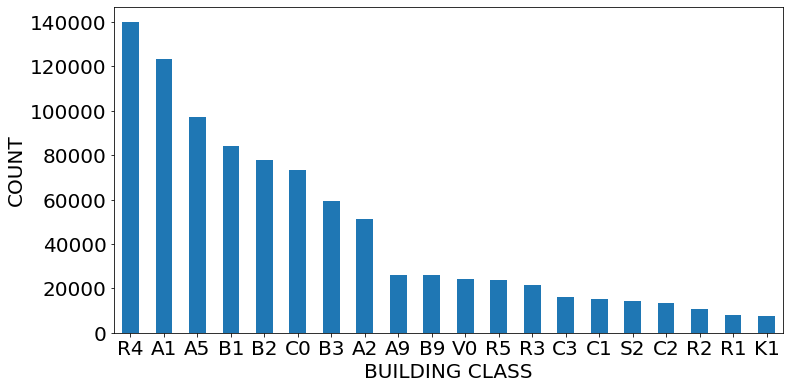

In [50]:
data['BLDGCL'].value_counts().head(20).plot(kind='bar')
plt.xlabel("BUILDING CLASS")
plt.ylabel("COUNT")
plt.xticks(rotation=0)

In [51]:
data['TAXCLASS'].count() * 100 / numrecords

100.0

In [52]:
len(data['TAXCLASS'].unique())

11

In [53]:
data['TAXCLASS'].value_counts()

1     660721
2     188612
4     104310
2A     40574
1B     24738
1A     21667
2B     13964
2C     10795
3       4638
1C       946
1D        29
Name: TAXCLASS, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '4'),
  Text(3, 0, '2A'),
  Text(4, 0, '1B'),
  Text(5, 0, '1A'),
  Text(6, 0, '2B'),
  Text(7, 0, '2C'),
  Text(8, 0, '3'),
  Text(9, 0, '1C'),
  Text(10, 0, '1D')])

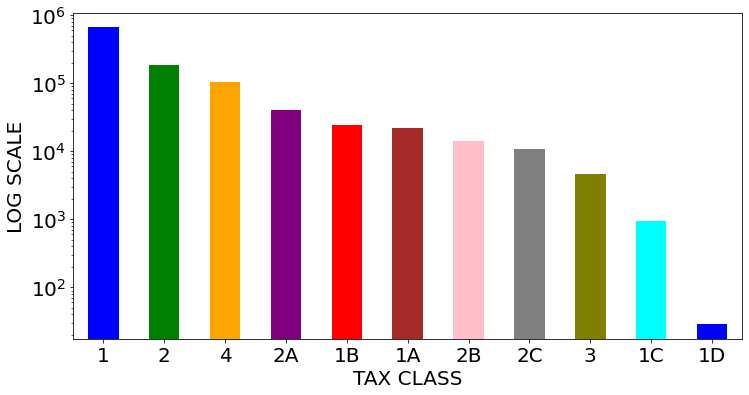

In [54]:
plt.yscale('log')
data['TAXCLASS'].value_counts().head(20).plot(kind='bar', color = ["blue","green","orange","purple","red","brown","pink","grey","olive","cyan"])
plt.xlabel("TAX CLASS")
plt.ylabel("LOG SCALE")
plt.xticks(rotation=0)

In [55]:
data['LTFRONT'].count() * 100 / numrecords

100.0

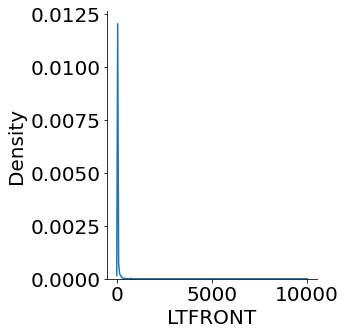

In [56]:
sns.displot(data['LTFRONT'], kind = 'kde')

<AxesSubplot:xlabel='LTFRONT'>

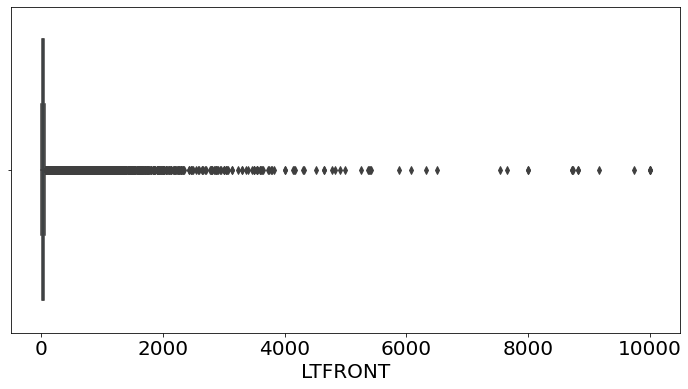

In [57]:
sns.boxplot(x='LTFRONT', data=data)

C:\Users\karan_000\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LTFRONT', ylabel='Density'>

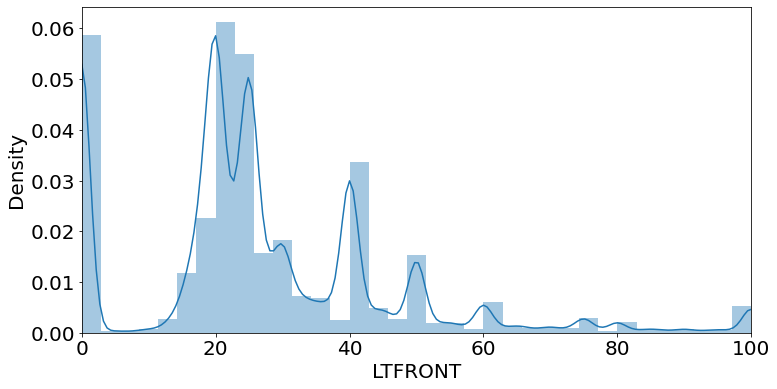

In [58]:
#look at the most relevant range
xhigh = 100
plt.xlim(0,xhigh)
temp = data[data['LTFRONT'] <= xhigh]
sns.distplot(temp['LTFRONT'],bins=35, kde=True)

C:\Users\karan_000\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LTFRONT'>

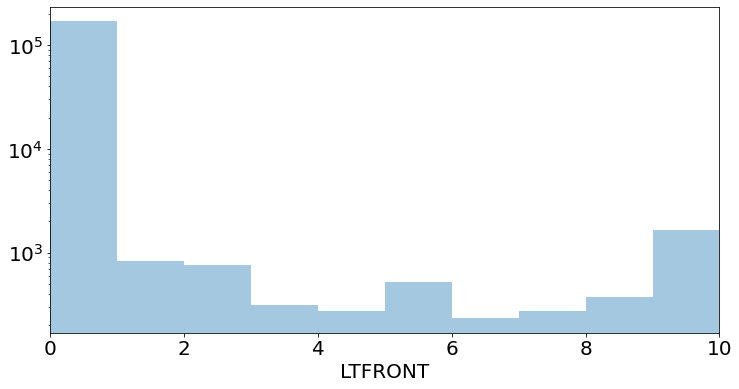

In [59]:
# look at the very small sizes, including zeros
xhigh = 10
plt.xlim(0,xhigh)
temp = data[data['LTFRONT'] <= xhigh]
plt.yscale('log')
sns.distplot(temp['LTFRONT'],bins=10, kde=False)

<AxesSubplot:xlabel='LTDEPTH'>

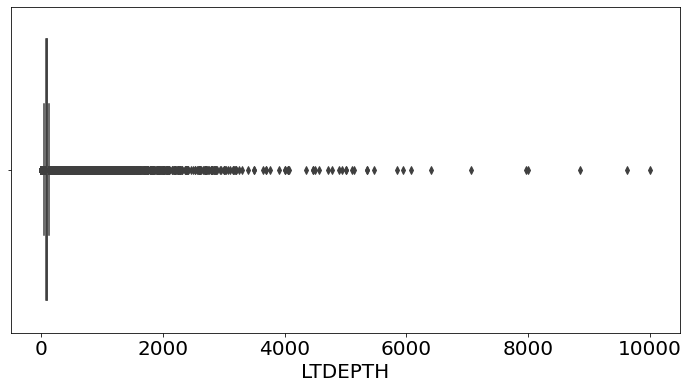

In [60]:
sns.boxplot(x='LTDEPTH', data=data)

C:\Users\karan_000\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(1e-05, 0.1)

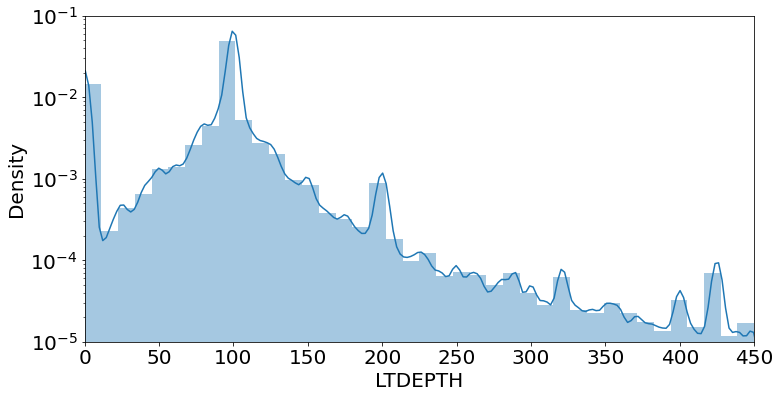

In [61]:
#look at the most relevant range
xhigh = 450
plt.xlim(0,xhigh)
temp = data[data['LTDEPTH'] <= xhigh]
plt.yscale('log')
sns.distplot(temp['LTDEPTH'],bins=40, kde=True)
plt.ylim(0.00001,0.1)

C:\Users\karan_000\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LTDEPTH'>

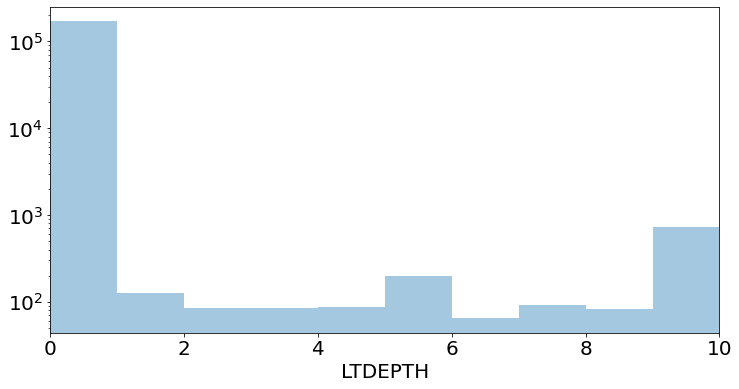

In [62]:
# look at the very small sizes, including zeros
xhigh = 10
plt.xlim(0,xhigh)
temp = data[data['LTDEPTH'] <= xhigh]
plt.yscale('log')
sns.distplot(temp['LTDEPTH'],bins=10, kde=False)

### Look at the number of sizes that are zero or unusually small. These aren't really zero, more likely they're missing data

In [63]:
len(data[data['LTFRONT']==0])

169108

In [64]:
len(data[data['LTFRONT']==1])

839

In [65]:
len(data[data["LTFRONT"]==2])

762

In [66]:
data['LTFRONT'].value_counts()

0       169108
20      135178
25      117306
40       85389
18       40668
         ...  
1032         1
1461         1
2485         1
2059         1
1023         1
Name: LTFRONT, Length: 1297, dtype: int64

In [67]:
data['LTDEPTH'].count() * 100 / numrecords

100.0

<AxesSubplot:xlabel='LTDEPTH'>

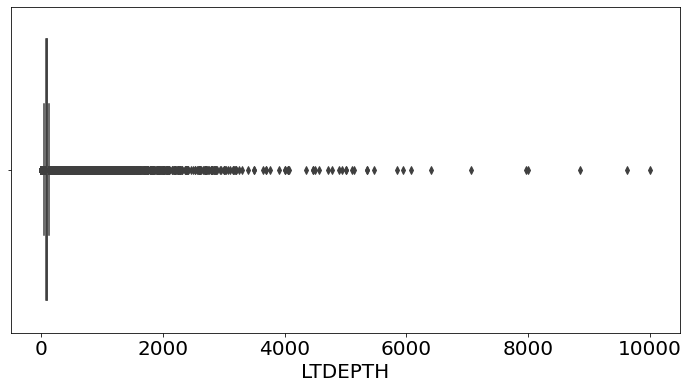

In [68]:
sns.boxplot(x='LTDEPTH', data=data)

In [69]:
len(data[data['LTDEPTH']==0])

170128

In [70]:
len(data[data['LTDEPTH']==1])

127

In [71]:
len(data[data["LTDEPTH"]==2])

84

In [72]:
data['LTDEPTH'].value_counts()

100     464541
0       170128
95       31612
90       20294
80       16671
         ...  
2276         1
3300         1
2278         1
2281         1
1471         1
Name: LTDEPTH, Length: 1370, dtype: int64

Text(0, 0.5, 'Count')

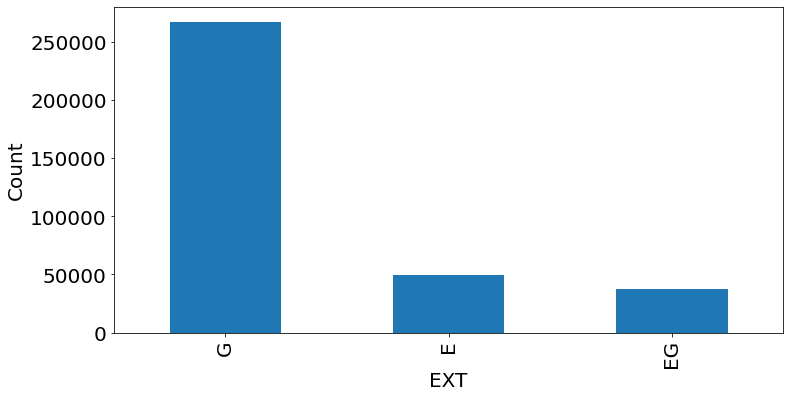

In [73]:
data['EXT'].value_counts().plot(kind='bar')
plt.xlabel("EXT")
plt.ylabel("Count")

In [74]:
data['EXT'].count() * 100 / numrecords

33.081884679092504

In [75]:
data['EXT'].value_counts().head(20)
#plt.xticks(rotation=0)

G     266970
E      49442
EG     37893
Name: EXT, dtype: int64

In [76]:
data['STORIES'].count() * 100 / numrecords

94.74656253909919

In [77]:
sum(pd.isnull(data['STORIES']))

56264

<AxesSubplot:xlabel='STORIES'>

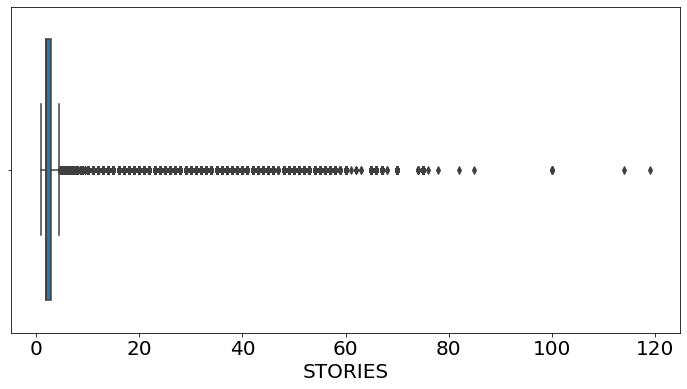

In [78]:
sns.boxplot(x='STORIES', data=data)

In [79]:
len(data[data['STORIES'] == 0])

0

<AxesSubplot:xlabel='STORIES', ylabel='Count'>

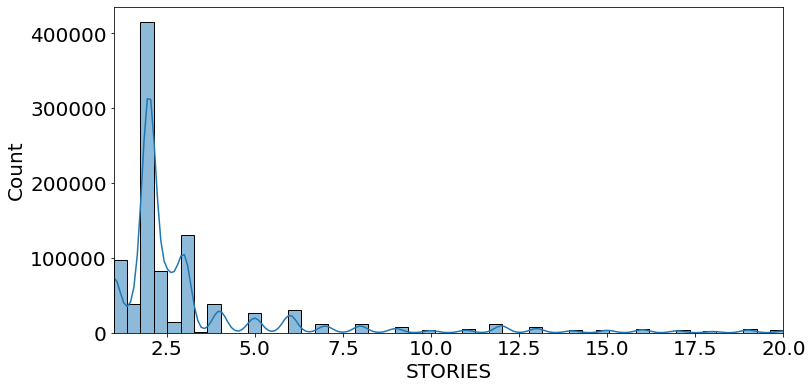

In [80]:
xhigh = 20
plt.xlim(1,xhigh)
temp = data[data['STORIES'] <= xhigh]
sns.histplot(temp['STORIES'],bins=50, kde=True)

<AxesSubplot:xlabel='STORIES', ylabel='Count'>

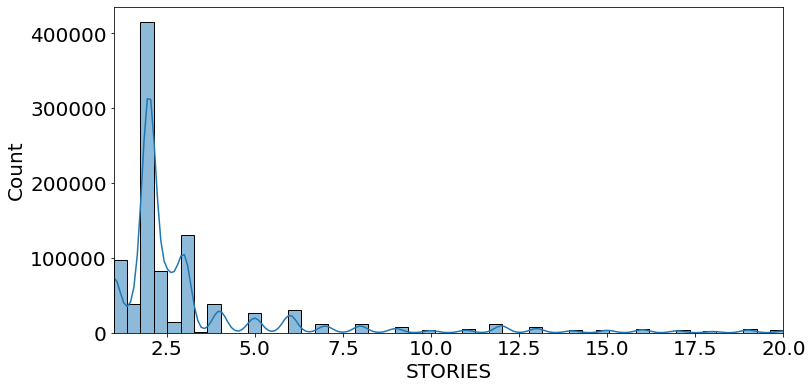

In [81]:
xhigh = 20
temp = data[data['STORIES'] > 0]
temp.count()
plt.xlim(1,xhigh)
temp = temp[temp['STORIES'] <= xhigh]
sns.histplot(temp['STORIES'],bins=50, kde=True)

In [82]:
len(data[data['STORIES'] == 1])

96706

In [83]:
data['STORIES'].value_counts()

2.0      415092
3.0      130127
1.0       96706
2.5       82292
4.0       38342
          ...  
82.0          1
119.0         1
76.0          1
61.0          1
114.0         1
Name: STORIES, Length: 111, dtype: int64

In [84]:
data['FULLVAL'].count() * 100 / numrecords

100.0

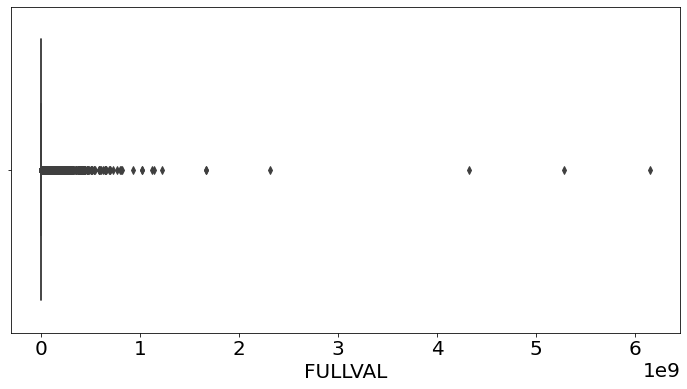

In [85]:
sns.boxplot(x='FULLVAL', data=data)
plt.savefig("boxplot.png")

C:\Users\karan_000\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


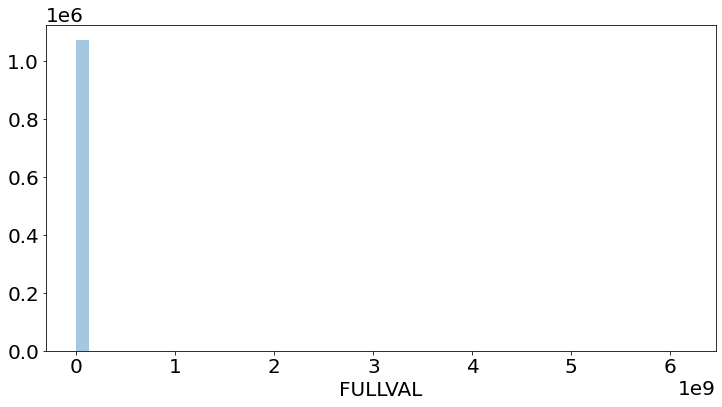

In [86]:
sns.distplot(data['FULLVAL'],kde=False)
plt.savefig('dist bad.png')

In [87]:
len(data[data['FULLVAL']==0])

13007

In [88]:
len(data[data['FULLVAL']==1])

0

In [89]:
len(data[data["FULLVAL"]==2])

0

C:\Users\karan_000\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


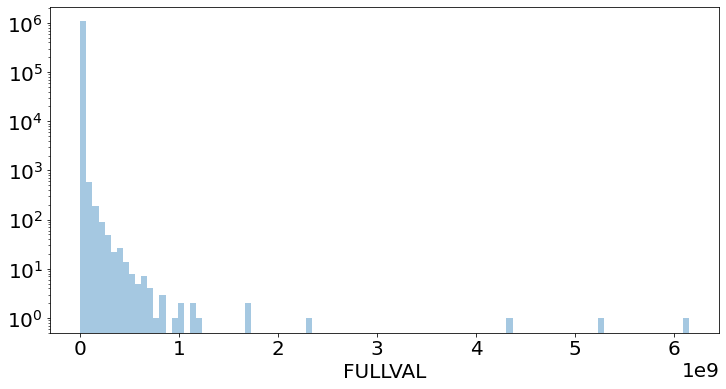

In [90]:
temp = data[data['FULLVAL'] >= 0]
ax = sns.distplot(temp['FULLVAL'],bins=100, kde=False)
ax.set_yscale('log')

C:\Users\karan_000\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='FULLVAL', ylabel='Density'>

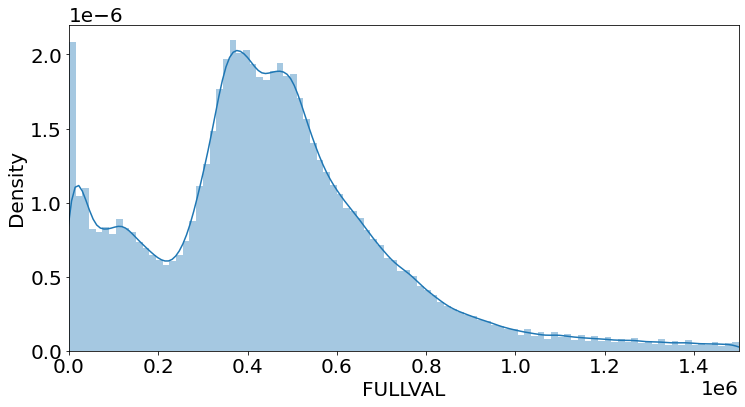

In [91]:
xhigh = 1500000
plt.xlim(0,xhigh)
temp = data[data['FULLVAL'] <= xhigh]
sns.distplot(temp['FULLVAL'],bins=100, kde=True)

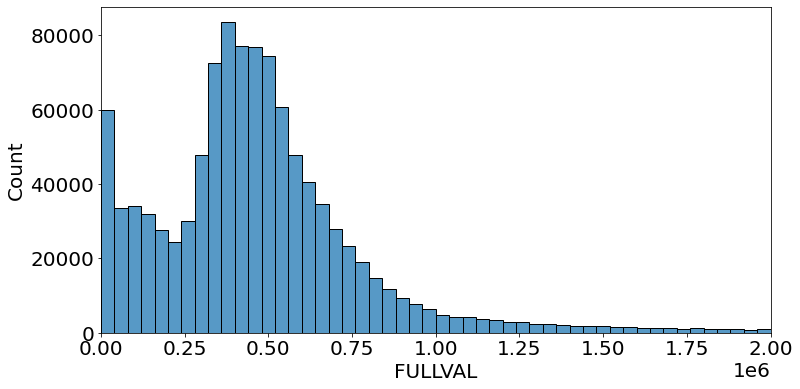

In [92]:
xhigh = 2000000
plt.xlim(0,xhigh)
temp = data[data['FULLVAL'] <= xhigh]
sns.histplot(temp['FULLVAL'],bins=50, kde=False)
plt.savefig('dist good.png')

C:\Users\karan_000\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='FULLVAL', ylabel='Density'>

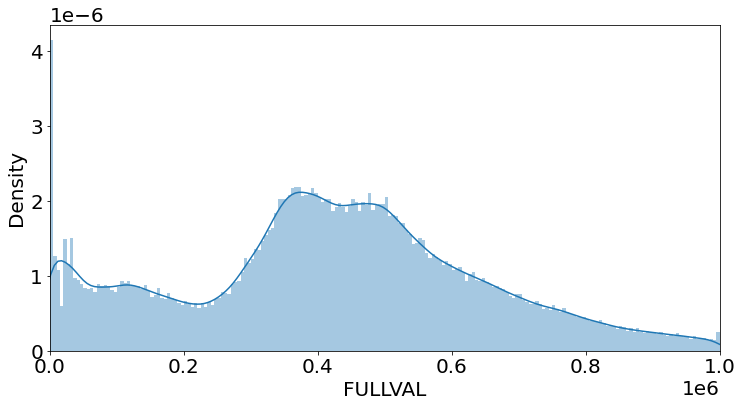

In [93]:
xhigh = 1000000
plt.xlim(0,xhigh)
temp = data[data['FULLVAL'] <= xhigh]
sns.distplot(temp['FULLVAL'],bins=200, kde=True)

<AxesSubplot:xlabel='FULLVAL', ylabel='Count'>

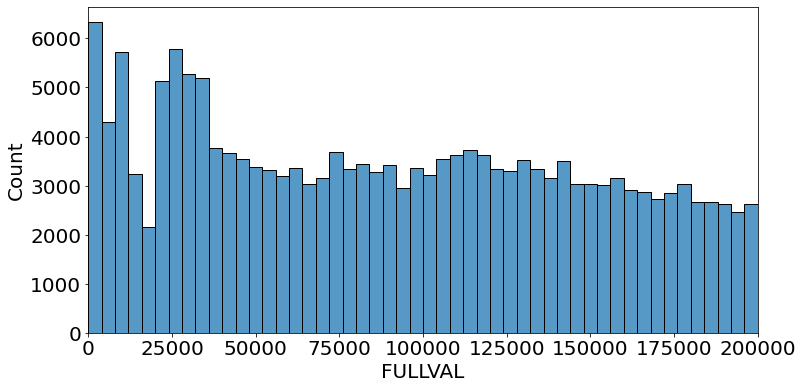

In [94]:
xhigh = 200000
plt.xlim(0,xhigh)
temp = data[(data['FULLVAL'] <= xhigh) & (data['FULLVAL']) > 0]
sns.histplot(temp['FULLVAL'],bins=50, kde=False)

In [95]:
len(data[data['FULLVAL'] == 0])

13007

In [96]:
data['AVLAND'].count() * 100 / numrecords

100.0

<AxesSubplot:xlabel='AVLAND'>

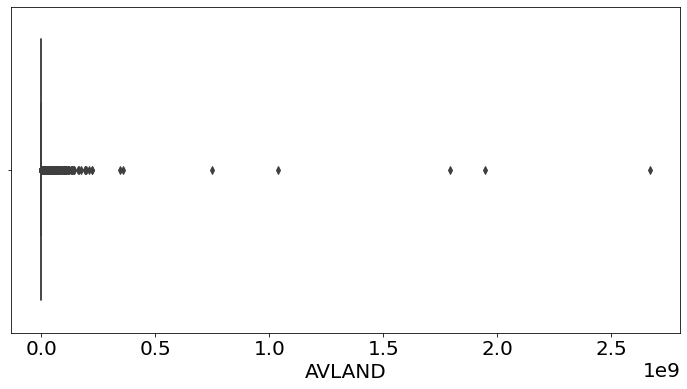

In [97]:
sns.boxplot(x='AVLAND', data=data)

C:\Users\karan_000\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AVLAND'>

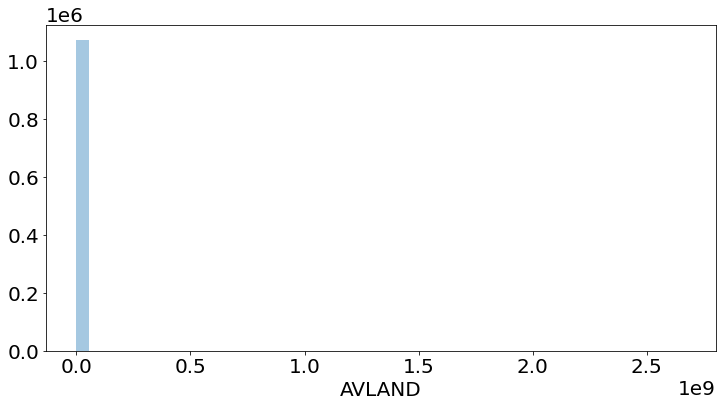

In [98]:
sns.distplot(data['AVLAND'],kde=False)

In [99]:
len(data[data['AVLAND']==0])

13009

In [100]:
len(data[data['AVLAND']==1])

3

In [101]:
len(data[data["AVLAND"]==2])

13

<AxesSubplot:xlabel='AVLAND', ylabel='Count'>

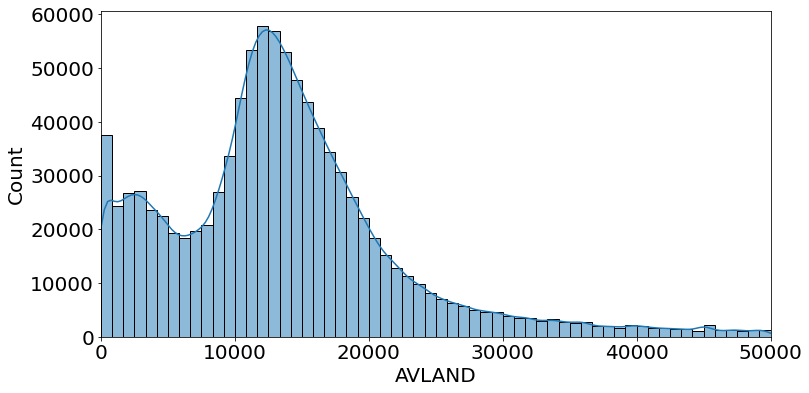

In [102]:
xhigh = 50000
plt.xlim(0,xhigh)
temp = data[data['AVLAND'] <= xhigh]
sns.histplot(temp['AVLAND'],bins=60, kde=True)

In [103]:
data['AVTOT'].count() * 100 / numrecords

100.0

<AxesSubplot:xlabel='AVTOT'>

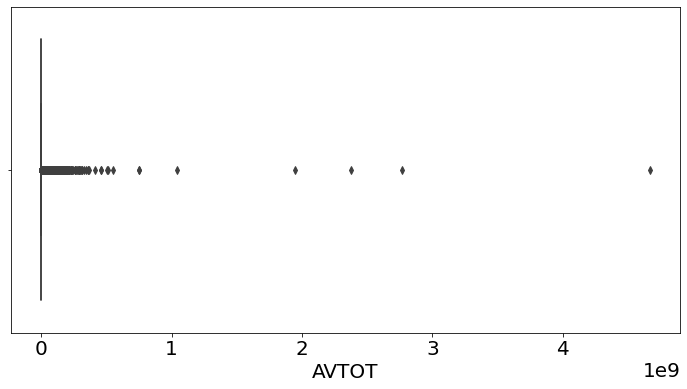

In [104]:
sns.boxplot(x='AVTOT', data=data)

<AxesSubplot:xlabel='AVTOT', ylabel='Count'>

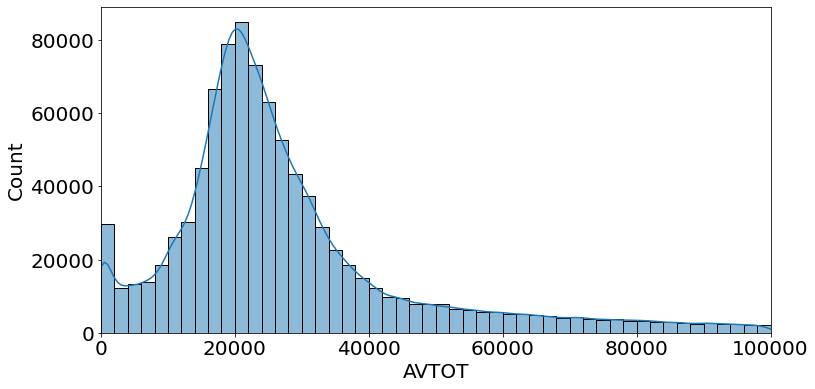

In [105]:
xhigh = 100000
plt.xlim(0,xhigh)
temp = data[data['AVTOT'] <= xhigh]
sns.histplot(temp['AVTOT'],bins=50, kde=True)

In [106]:
len(data[data['AVTOT']==0])

13007

In [107]:
len(data[data['AVTOT']==1])

3

In [108]:
len(data[data["AVTOT"]==2])

2

In [109]:
data['EXLAND'].count() * 100 / numrecords

100.0

<AxesSubplot:xlabel='EXLAND'>

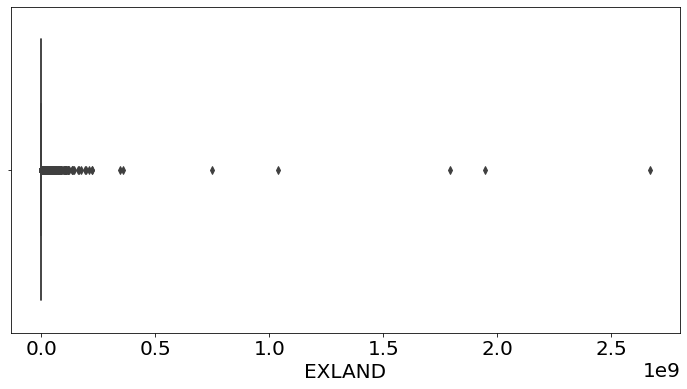

In [110]:
sns.boxplot(x='EXLAND', data=data)

<AxesSubplot:xlabel='EXLAND', ylabel='Count'>

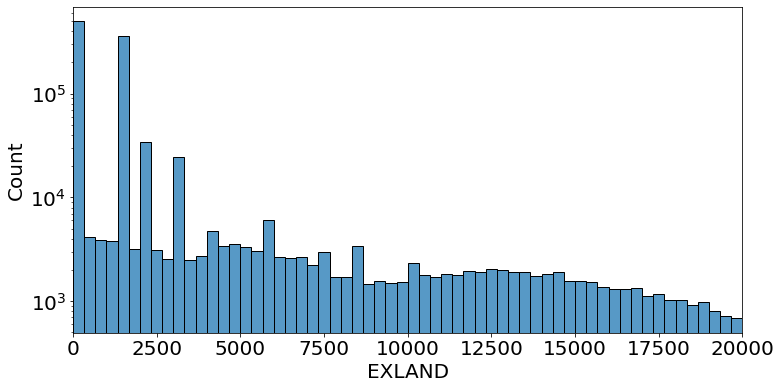

In [111]:
xhigh = 20000
plt.xlim(0,xhigh)
temp = data[data['EXLAND'] <= xhigh]
plt.yscale('log')
sns.histplot(temp['EXLAND'],bins=60, kde=False)

In [112]:
len(data[data['EXLAND']==0])

491699

In [113]:
len(data[data['EXLAND']==1])

8

In [114]:
len(data[data["EXLAND"]==2])

15

In [115]:
data['EXTOT'].count() * 100 / numrecords

100.0

<AxesSubplot:xlabel='EXTOT'>

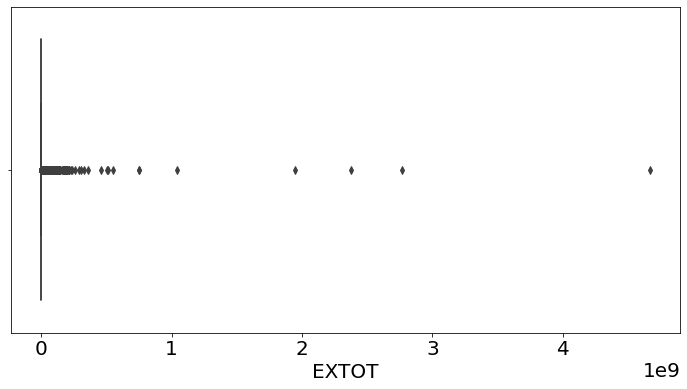

In [116]:
sns.boxplot(x='EXTOT', data=data)

<AxesSubplot:xlabel='EXTOT', ylabel='Count'>

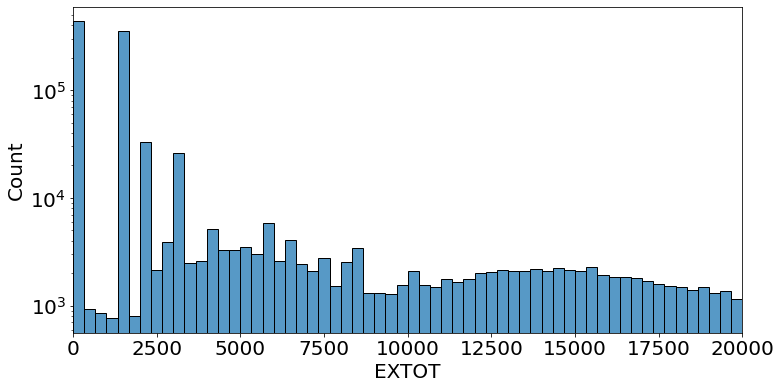

In [117]:
xhigh = 20000
plt.xlim(0,xhigh)
temp = data[data['EXTOT'] <= xhigh]
plt.yscale('log')
sns.histplot(temp['EXTOT'],bins=60, kde=False)

In [118]:
len(data[data['EXTOT']==0])

432572

In [119]:
len(data[data['EXTOT']==1])

10

In [120]:
len(data[data["EXTOT"]==2])

2

In [121]:
data['EXCD1'].count() * 100 / numrecords

59.616393742635346

<AxesSubplot:xlabel='EXCD1'>

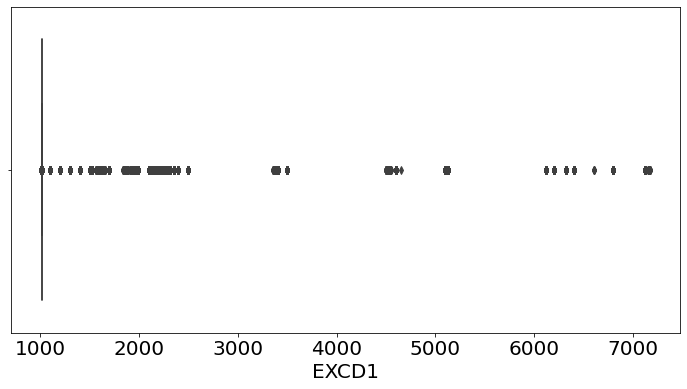

In [122]:
sns.boxplot(x='EXCD1', data=data)

C:\Users\karan_000\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EXCD1'>

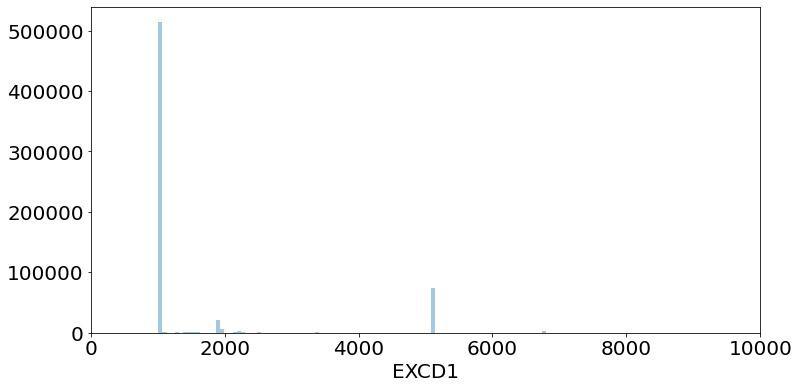

In [123]:
xhigh = 10000
plt.xlim(0,xhigh)
temp = data[data['EXCD1'] <= xhigh]
sns.distplot(temp['EXCD1'],bins=100, kde=False)

In [124]:
len(data[data['EXCD1']==0])

0

In [125]:
len(data[data['EXCD1']==1])

0

In [126]:
len(data[data["EXCD1"]==2])

0

In [127]:
data['EXCD1'].value_counts().head(10)

1017.0    425348
1010.0     49756
1015.0     31323
5113.0     23858
1920.0     17594
5110.0     16834
5114.0     14984
5111.0     10609
1021.0      6613
1986.0      4231
Name: EXCD1, dtype: int64

In [128]:
data['STADDR'].count() * 100 / numrecords

99.93688106562689

In [129]:
len(data['STADDR'].unique())

839281

In [130]:
data['STADDR'].value_counts()

501 SURF AVENUE        902
330 EAST 38 STREET     817
322 WEST 57 STREET     720
155 WEST 68 STREET     671
20 WEST 64 STREET      657
                      ... 
76 DEXTER AVENUE         1
32-46 110 STREET         1
966 HUGUENOT AVENUE      1
690 ACADEMY STREET       1
951 ASHFORD STREET       1
Name: STADDR, Length: 839280, dtype: int64

Text(0, 0.5, 'COUNT')

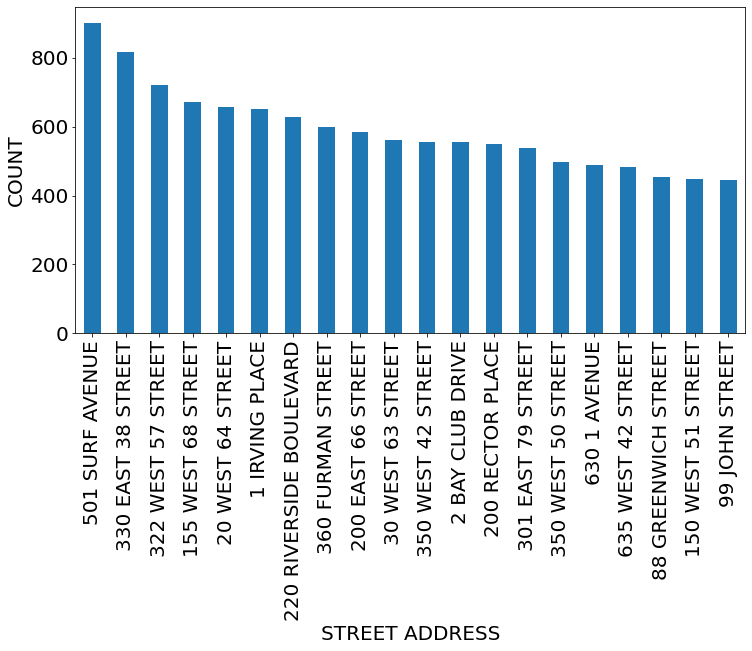

In [131]:
data['STADDR'].value_counts().head(20).plot(kind='bar')
plt.xlabel("STREET ADDRESS")
plt.ylabel("COUNT")

In [132]:
data['ZIP'].count() * 100 / numrecords

97.20913469169761

In [133]:
len(data['ZIP'].unique())

197

In [134]:
data['ZIP'].value_counts().head(10)

10314.0    24606
11234.0    20001
10312.0    18127
10462.0    16905
10306.0    16578
11236.0    15678
11385.0    14921
11229.0    12793
11211.0    12710
11207.0    12293
Name: ZIP, dtype: int64

<AxesSubplot:>

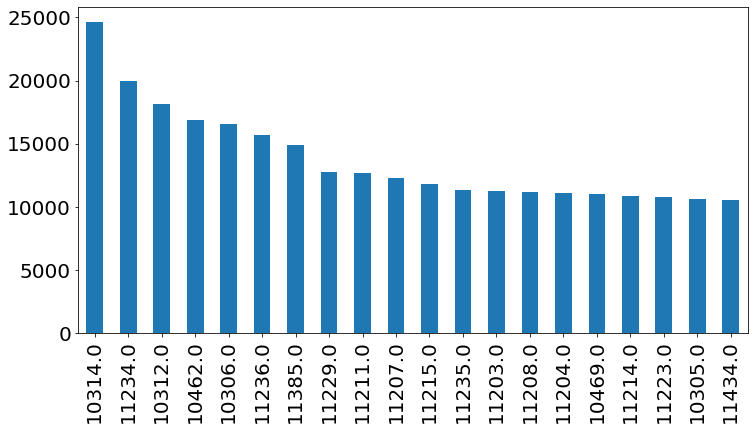

In [135]:
data['ZIP'].value_counts().head(20).plot(kind='bar')

In [136]:
data['EXMPTCL'].count() * 100 / numrecords

1.4546299979271593

In [137]:
len(data['EXMPTCL'].unique())

15

In [138]:
data['EXMPTCL'].value_counts()

X1    6912
X5    5208
X7     820
X2     770
X6     764
X4     441
X8     292
X3     259
X9     108
KI       1
A9       1
5        1
R4       1
VI       1
Name: EXMPTCL, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'X1'),
  Text(1, 0, 'X5'),
  Text(2, 0, 'X7'),
  Text(3, 0, 'X2'),
  Text(4, 0, 'X6'),
  Text(5, 0, 'X4'),
  Text(6, 0, 'X8'),
  Text(7, 0, 'X3'),
  Text(8, 0, 'X9'),
  Text(9, 0, 'KI'),
  Text(10, 0, 'A9'),
  Text(11, 0, '5'),
  Text(12, 0, 'R4'),
  Text(13, 0, 'VI')])

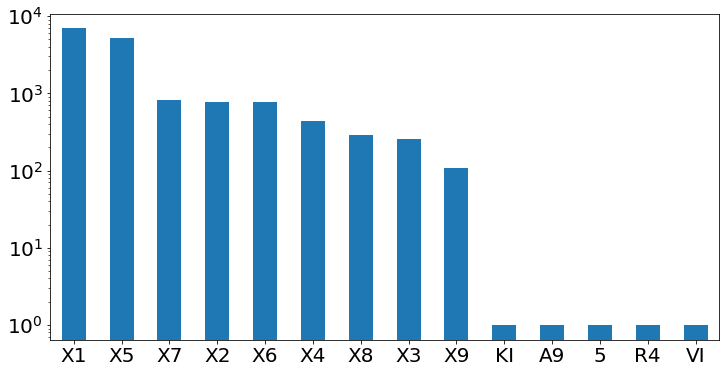

In [139]:
plt.yscale('log')
data['EXMPTCL'].value_counts().head(20).plot(kind='bar')
plt.xticks(rotation=0)

<AxesSubplot:xlabel='BLDFRONT'>

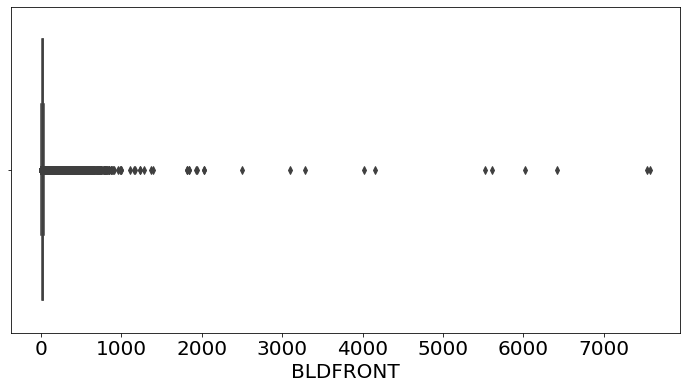

In [140]:
sns.boxplot(x='BLDFRONT', data=data)

<AxesSubplot:xlabel='BLDFRONT', ylabel='Count'>

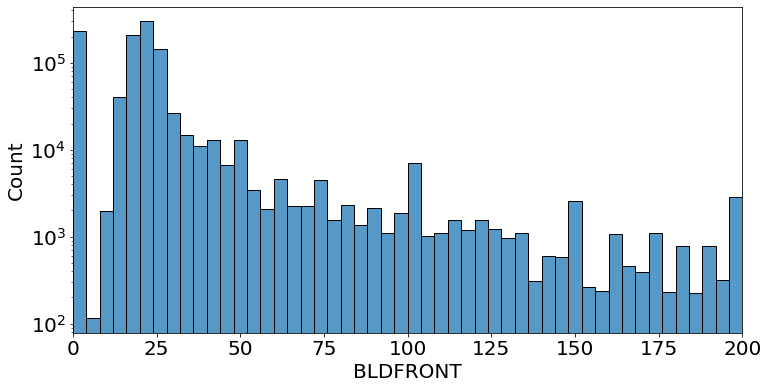

In [141]:
#look at the most relevant range
xhigh = 200
plt.xlim(0,xhigh)
temp = data[data['BLDFRONT'] <= xhigh]
plt.yscale('log')
sns.histplot(temp['BLDFRONT'],bins=50, kde=False)

C:\Users\karan_000\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BLDFRONT'>

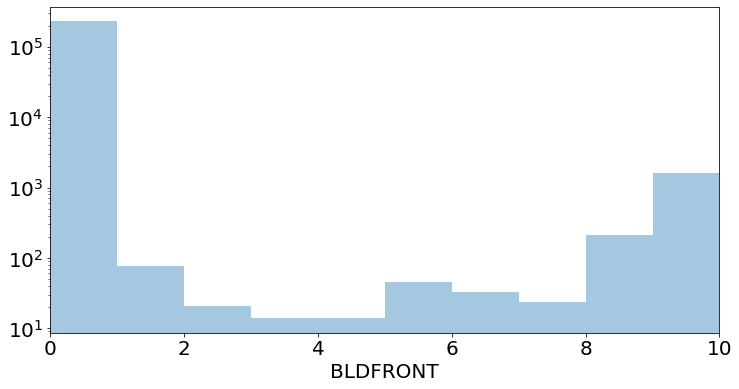

In [142]:
# look at the very small sizes, including zeros
xhigh = 10
plt.xlim(0,xhigh)
temp = data[data['BLDFRONT'] <= xhigh]
plt.yscale('log')
sns.distplot(temp['BLDFRONT'],bins=10, kde=False)

<AxesSubplot:xlabel='BLDDEPTH'>

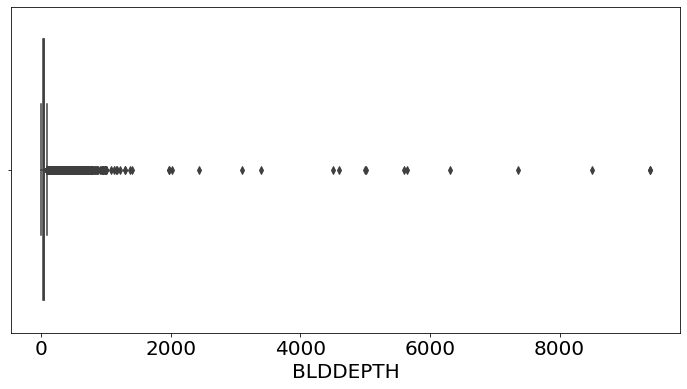

In [143]:
sns.boxplot(x='BLDDEPTH', data=data)

C:\Users\karan_000\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BLDDEPTH', ylabel='Density'>

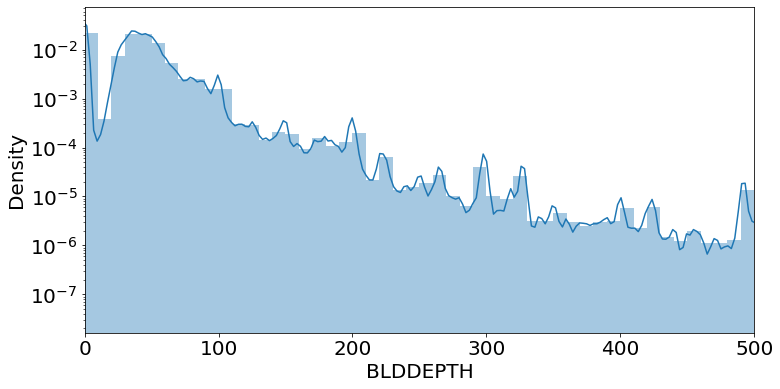

In [144]:
#look at the most relevant range
xhigh = 500
plt.xlim(0,xhigh)
temp = data[data['BLDDEPTH'] <= xhigh]
plt.yscale('log')
sns.distplot(temp['BLDDEPTH'],bins=50, kde=True)

<AxesSubplot:xlabel='BLDDEPTH', ylabel='Count'>

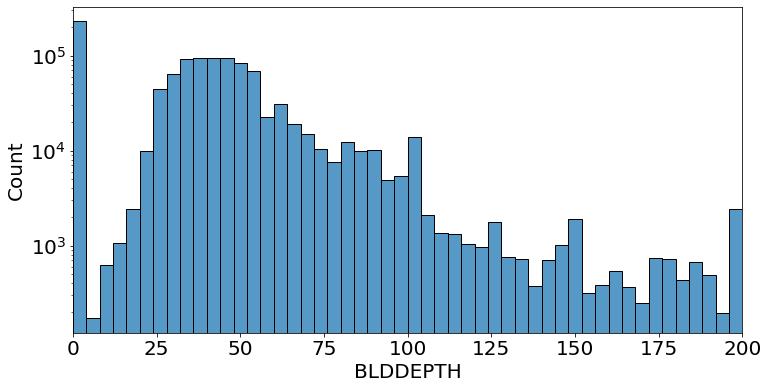

In [145]:
# look at the very small sizes, including zeros
xhigh = 200
plt.xlim(0,xhigh)
temp = data[data['BLDDEPTH'] <= xhigh]
plt.yscale('log')
sns.histplot(temp['BLDDEPTH'],bins=50, kde=False)

<AxesSubplot:xlabel='BLDFRONT'>

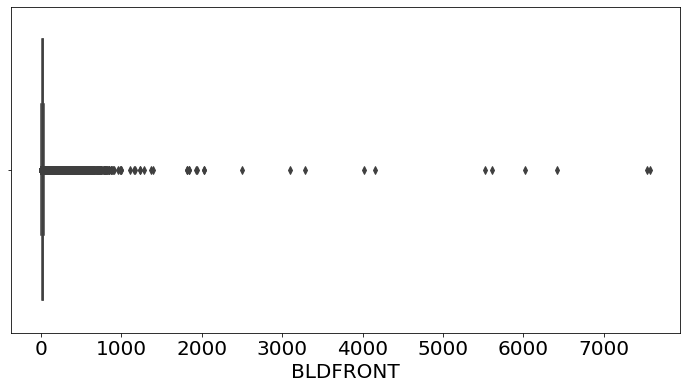

In [146]:
sns.boxplot(x='BLDFRONT', data=data)

C:\Users\karan_000\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BLDFRONT'>

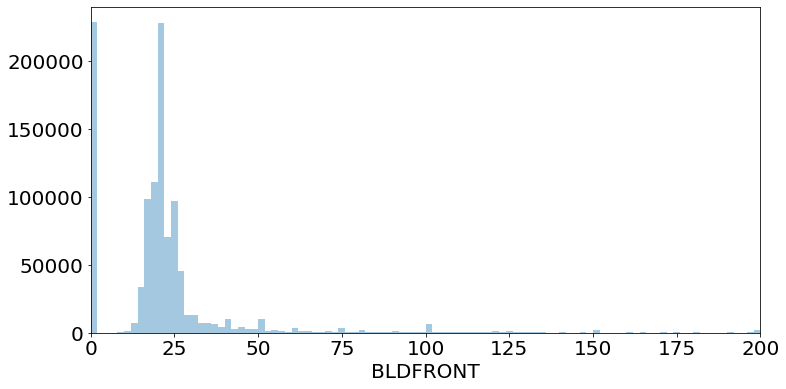

In [147]:
xhigh = 200
plt.xlim(0,xhigh)
temp = data[data['BLDFRONT'] <= xhigh]
sns.distplot(temp['BLDFRONT'],bins=100, kde=False)

In [148]:
len(data[data['BLDFRONT']==0])

228815

In [149]:
len(data[data['BLDFRONT']==1])

77

In [150]:
len(data[data["BLDFRONT"]==2])

21

In [151]:
data['BLDDEPTH'].count() * 100 / numrecords

100.0

<AxesSubplot:xlabel='BLDDEPTH'>

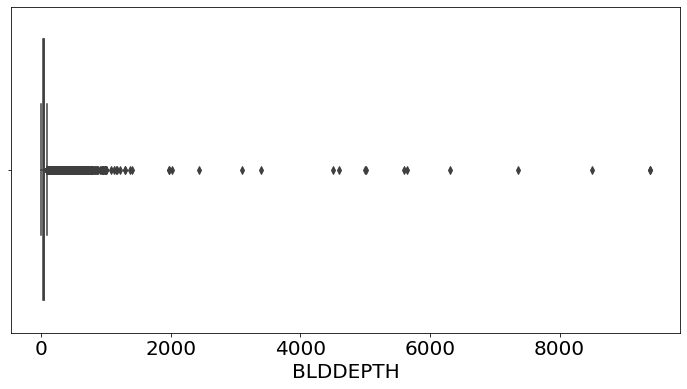

In [152]:
sns.boxplot(x='BLDDEPTH', data=data)

C:\Users\karan_000\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BLDDEPTH'>

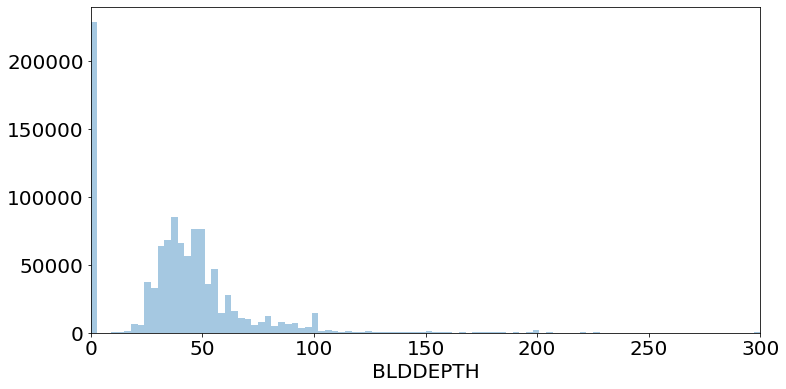

In [153]:
xhigh = 300
plt.xlim(0,xhigh)
temp = data[data['BLDDEPTH'] <= xhigh]
sns.distplot(temp['BLDDEPTH'],bins=100, kde=False)

In [154]:
len(data[data['BLDDEPTH']==0])

228853

In [155]:
len(data[data['BLDDEPTH']==1])

59

In [156]:
len(data[data["BLDDEPTH"]==2])

10

In [157]:
data['AVLAND2'].count() * 100 / numrecords

26.398467218303743

<AxesSubplot:xlabel='AVLAND2'>

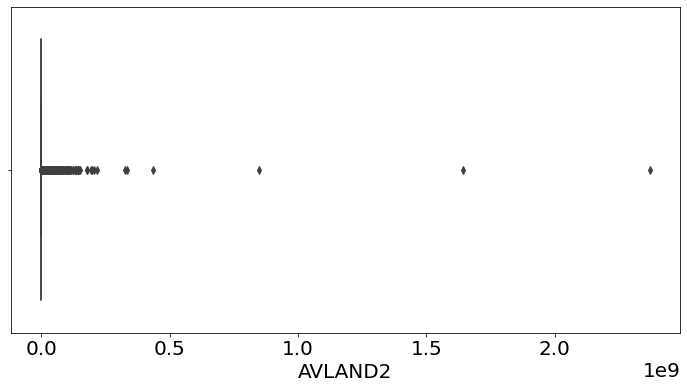

In [158]:
sns.boxplot(x='AVLAND2', data=data)

<AxesSubplot:xlabel='AVLAND2', ylabel='Count'>

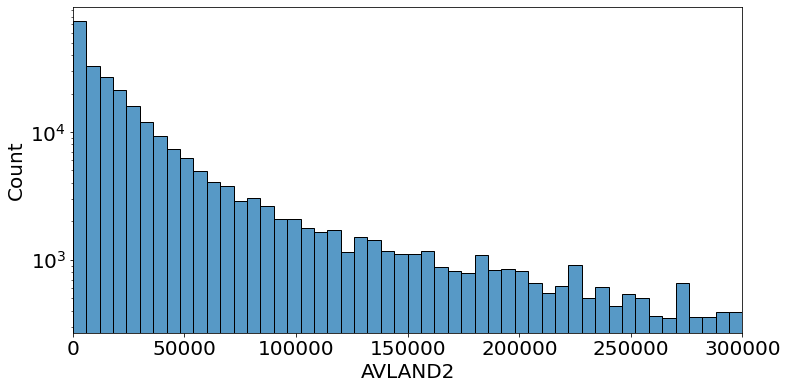

In [159]:
xhigh = 300000
plt.xlim(0,xhigh)
temp = data[data['AVLAND2'] <= xhigh]
plt.yscale('log')
sns.histplot(temp['AVLAND2'],bins=50, kde=False)

In [160]:
data['AVTOT2'].count() * 100 / numrecords

26.399027445531907

<AxesSubplot:xlabel='AVTOT2'>

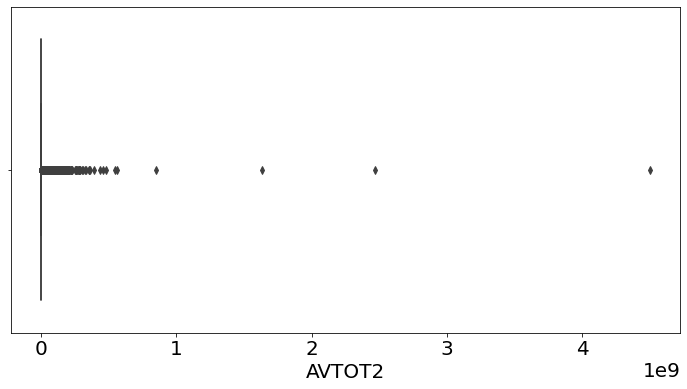

In [161]:
sns.boxplot(x='AVTOT2', data=data)

<AxesSubplot:xlabel='AVTOT2', ylabel='Count'>

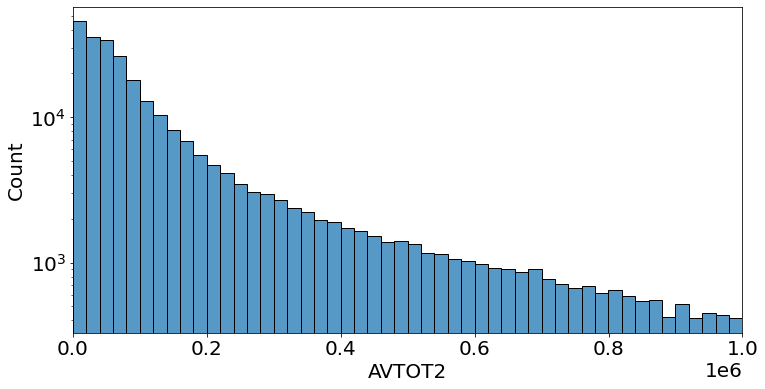

In [162]:
xhigh = 1000000
plt.xlim(0,xhigh)
temp = data[data['AVTOT2'] <= xhigh]
plt.yscale('log')
sns.histplot(temp['AVTOT2'],bins=50, kde=False)

In [163]:
data['EXLAND2'].count() * 100 / numrecords

8.165218479281863

<AxesSubplot:xlabel='EXLAND2'>

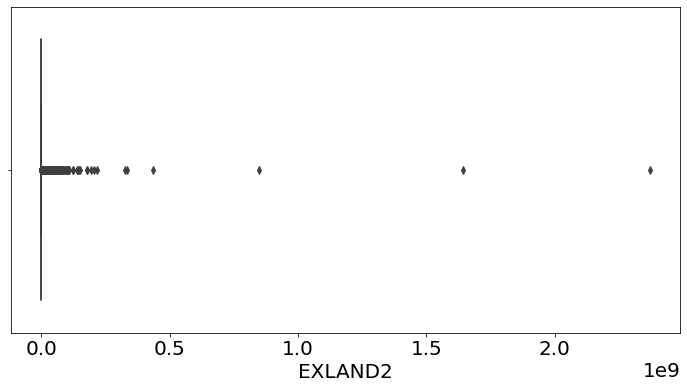

In [164]:
sns.boxplot(x='EXLAND2', data =data)

<AxesSubplot:xlabel='EXLAND2', ylabel='Count'>

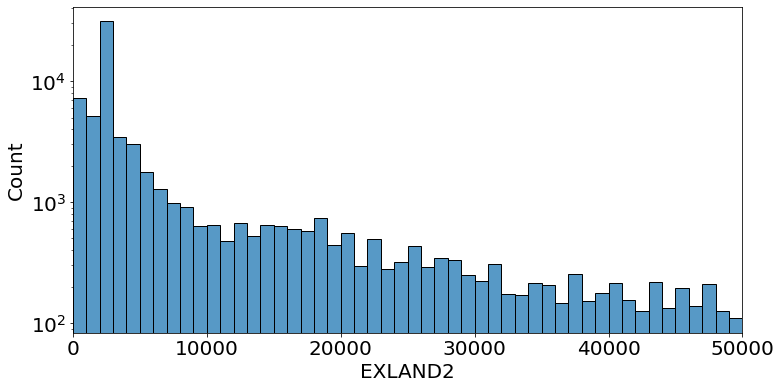

In [165]:
xhigh = 50000
plt.xlim(0,xhigh)
temp = data[data['EXLAND2'] <= xhigh]
plt.yscale('log')
sns.histplot(temp['EXLAND2'],bins=50, kde=False)

In [166]:
data['EXTOT2'].count() * 100 / numrecords

12.215567967701032

<AxesSubplot:xlabel='EXTOT2'>

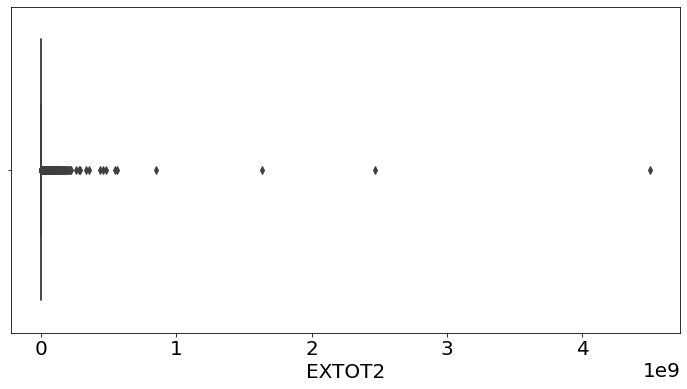

In [167]:
sns.boxplot(x='EXTOT2', data=data)

<AxesSubplot:xlabel='EXTOT2', ylabel='Count'>

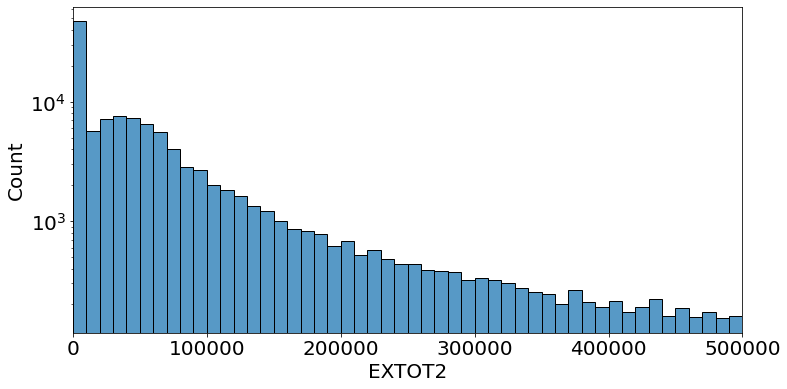

In [168]:
xhigh = 500000
plt.xlim(0,xhigh)
temp = data[data['EXTOT2'] <= xhigh]
plt.yscale('log')
sns.histplot(temp['EXTOT2'],bins=50, kde=False)

In [169]:
data['EXCD2'].value_counts().head(15)

1017.0    65777
1015.0    12337
5112.0     6867
1019.0     3178
1920.0     2961
1200.0      881
1101.0      494
5129.0      227
1986.0       35
1022.0       31
1985.0       21
1604.0       13
5109.0       11
1021.0        8
7160.0        7
Name: EXCD2, dtype: int64

<AxesSubplot:xlabel='EXCD2'>

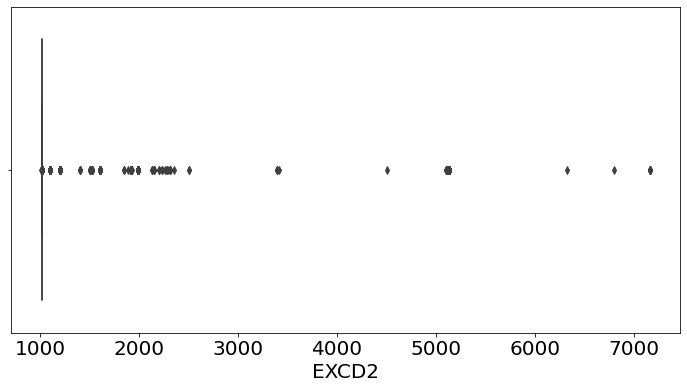

In [170]:
sns.boxplot(x='EXCD2', data=data)

C:\Users\karan_000\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EXCD2'>

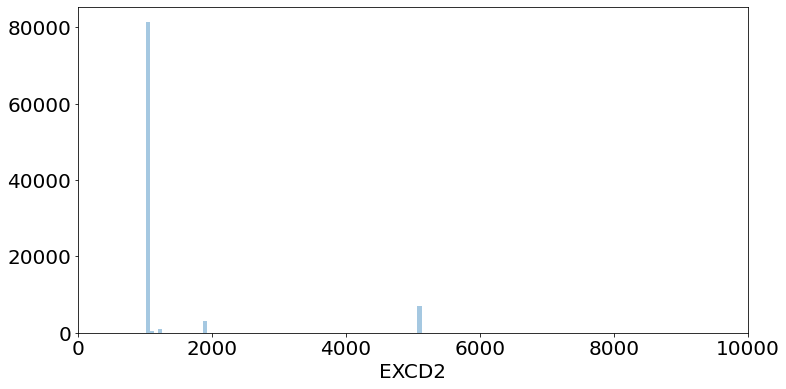

In [171]:
xhigh = 10000
plt.xlim(0,xhigh)
temp = data[data['EXCD2'] <= xhigh]
sns.distplot(temp['EXCD2'],bins=100, kde=False)

In [172]:
data['PERIOD'].count() * 100 / numrecords

100.0

In [173]:
len(data['PERIOD'].unique())

1

In [174]:
data['PERIOD'].value_counts()

FINAL    1070994
Name: PERIOD, dtype: int64

(array([0]), [Text(0, 0, 'FINAL')])

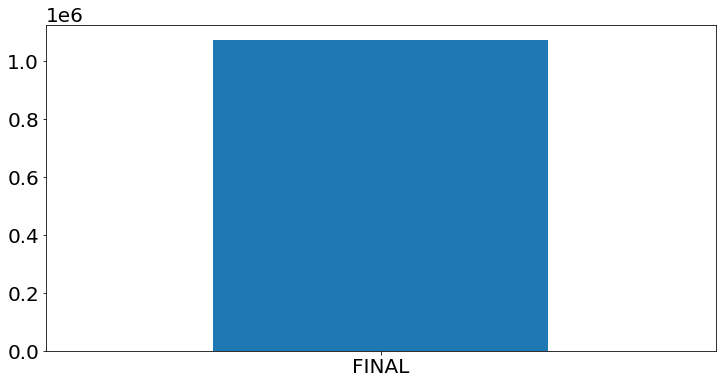

In [175]:
data['PERIOD'].value_counts().head(20).plot(kind='bar')
plt.xticks(rotation=0)

In [176]:
data['YEAR'].count() * 100 / numrecords

100.0

In [177]:
len(data['YEAR'].unique())

1

In [178]:
data['YEAR'].value_counts()

2010/11    1070994
Name: YEAR, dtype: int64

(array([0]), [Text(0, 0, '2010/11')])

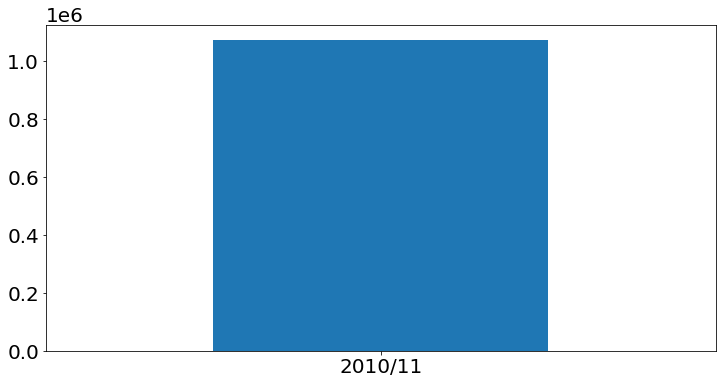

In [179]:
data['YEAR'].value_counts().head(20).plot(kind='bar')
plt.xticks(rotation=0)

In [180]:
data['VALTYPE'].count() * 100 / numrecords

100.0

(array([0]), [Text(0, 0, 'AC-TR')])

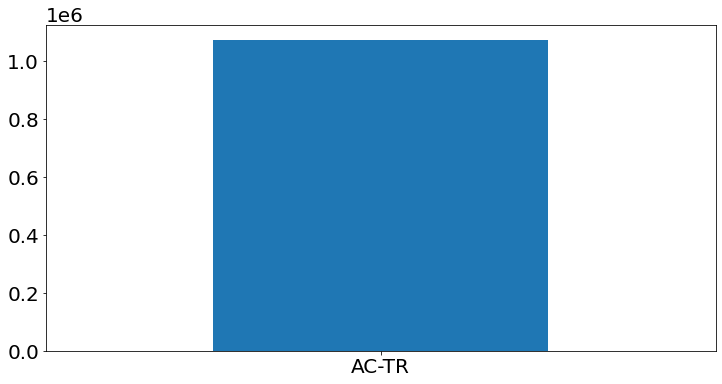

In [181]:
data['VALTYPE'].value_counts().head(20).plot(kind='bar')
plt.xticks(rotation=0)

In [182]:
print('duration: ', datetime.now() - start_time)

duration:  0:11:55.283165


# Remove Exclusions, Handling Missing values & Feature Engineering

In [192]:
# look at the most frequent owners
remove_list = data['OWNER'].value_counts().head(20).index.tolist()
remove_list

['PARKCHESTER PRESERVAT',
 'PARKS AND RECREATION',
 'DCAS',
 'HOUSING PRESERVATION',
 'CITY OF NEW YORK',
 'DEPT OF ENVIRONMENTAL',
 'BOARD OF EDUCATION',
 'NEW YORK CITY HOUSING',
 'CNY/NYCTA',
 'NYC HOUSING PARTNERSH',
 'YORKVILLE TOWERS ASSO',
 'DEPARTMENT OF BUSINES',
 'DEPT OF TRANSPORTATIO',
 'MTA/LIRR',
 'PARCKHESTER PRESERVAT',
 'MH RESIDENTIAL 1, LLC',
 '434 M LLC',
 'LINCOLN PLAZA ASSOCIA',
 'DEUTSCHE BANK NATIONA',
 '561 11TH AVENUE TMG L']

In [193]:
remove_list.remove('YORKVILLE TOWERS ASSO')
remove_list.remove('434 M LLC')
remove_list.remove('DEUTSCHE BANK NATIONA')
remove_list.remove('561 11TH AVENUE TMG L')
remove_list.append('UNITED STATES OF AMER')
remove_list.append('U S GOVERNMENT OWNRD')
remove_list.append('THE CITY OF NEW YORK')
remove_list.append('NYS URBAN DEVELOPMENT')
remove_list.append('CULTURAL AFFAIRS')
remove_list.append('DEPT OF GENERAL SERVI')
remove_list.append('DEPT RE-CITY OF NY')
remove_list.append('NYS DEPT OF ENVIRONME')

In [194]:
remove_list

['PARKCHESTER PRESERVAT',
 'PARKS AND RECREATION',
 'DCAS',
 'HOUSING PRESERVATION',
 'CITY OF NEW YORK',
 'DEPT OF ENVIRONMENTAL',
 'BOARD OF EDUCATION',
 'NEW YORK CITY HOUSING',
 'CNY/NYCTA',
 'NYC HOUSING PARTNERSH',
 'DEPARTMENT OF BUSINES',
 'DEPT OF TRANSPORTATIO',
 'MTA/LIRR',
 'PARCKHESTER PRESERVAT',
 'MH RESIDENTIAL 1, LLC',
 'LINCOLN PLAZA ASSOCIA',
 'UNITED STATES OF AMER',
 'U S GOVERNMENT OWNRD',
 'THE CITY OF NEW YORK',
 'NYS URBAN DEVELOPMENT',
 'CULTURAL AFFAIRS',
 'DEPT OF GENERAL SERVI',
 'DEPT RE-CITY OF NY',
 'NYS DEPT OF ENVIRONME']

In [195]:
property_data = data[~data['OWNER'].isin(remove_list)].reset_index(drop=True)
property_data.shape

(1046826, 32)

In [196]:
len(data) -  len(property_data)

24168

## Filling in Missing ZIP

In [200]:
#ZIPS are missing. Replace NAN with 0 and count them
missing_zips = np.where(pd.isnull(property_data['ZIP']))[0]
len(missing_zips)

array([    416,    2188,    2189, ..., 1046722, 1046730, 1046744],
      dtype=int64)

In [201]:
for i in range (len(missing_zips)):
    if(property_data.loc[missing_zips[i] + 1 ,'ZIP'] == property_data.loc[missing_zips[i] - 1 ,'ZIP']):
        property_data.loc[missing_zips[i],'ZIP'] = property_data.loc[missing_zips[i] - 1 ,'ZIP']

In [202]:
#How many are still left to fill in
missing_zips = np.where(pd.isnull(property_data['ZIP']))[0]
len(missing_zips)

10245

In [203]:
# For the remaining missing Zips, just fill in with the previous record's zip
for i in range (len(missing_zips)):
    property_data.loc[missing_zips[i],'ZIP'] = property_data.loc[missing_zips[i] - 1 ,'ZIP']

In [204]:
missing_zips = np.where(pd.isnull(property_data['ZIP']))[0]
len(missing_zips)

0

# Filling in Missing STORIES

In [205]:
temp = property_data[property_data['STORIES'].isnull()]
len(temp)

43968

In [206]:
temp['TAXCLASS'].value_counts()

1B    19055
4     17979
2      3434
3      2416
1       877
2C      138
2B       34
2A       30
1A        5
Name: TAXCLASS, dtype: int64

In [207]:
mean_stories = property_data.groupby('TAXCLASS')['STORIES'].mean()
print(mean_stories)

TAXCLASS
1      2.111633
1A     1.656867
1B     4.000000
1C     3.052748
1D     1.068966
2     16.310549
2A     2.844032
2B     4.001635
2C     4.744977
3      1.000000
4      5.517257
Name: STORIES, dtype: float64


In [208]:
property_data['STORIES'] = property_data['STORIES'].fillna(value=0)
for index in mean_stories.index:
    property_data.loc[(property_data['STORIES']==0) & (property_data['TAXCLASS']==index),'STORIES']= mean_stories[index]

# Filling in Missing Values FULLVAL, AVLAND, AVTOT

In [210]:
#FULLVAL
property_data['FULLVAL'].replace('NaN',0)
temp = property_data[property_data['FULLVAL']!=0]
mean_fullval = temp.groupby('TAXCLASS')['FULLVAL'].mean()
print(mean_fullval)

TAXCLASS
1     5.700059e+05
1A    3.352942e+05
1B    3.738399e+05
1C    7.615359e+05
1D    2.233614e+07
2     8.005832e+05
2A    8.639066e+05
2B    1.254525e+06
2C    7.723493e+05
3     8.510005e+04
4     2.772747e+06
Name: FULLVAL, dtype: float64


In [211]:
#AVLAND
property_data['AVLAND'].replace('NaN',0)
temp_avland = property_data[property_data['AVLAND']!=0]
mean_avland = temp_avland.groupby('TAXCLASS')['AVLAND'].mean()

In [212]:
#AVTOT
property_data['AVTOT'].replace('NaN',0)
temp_avtot = property_data[property_data['AVTOT']!=0]
mean_avtot = temp_avtot.groupby('TAXCLASS')['AVTOT'].mean()

## Substituting decent values for AVLAND,AVTOT and FULLVAL from averages by TAXCLASS

In [213]:
%%time
for index in mean_fullval.index:
    property_data.loc[(property_data['FULLVAL']==0) & (property_data['TAXCLASS']==index),'FULLVAL']= mean_fullval[index]
    property_data.loc[(property_data['AVLAND']==0) & (property_data['TAXCLASS']==index),'AVLAND']= mean_avland[index]
    property_data.loc[(property_data['AVTOT']==0) & (property_data['TAXCLASS']==index),'AVTOT']= mean_avtot[index] 

Wall time: 14.2 s


# Filling In Missing Lot and Building Sizes

In [214]:
# Because these 4 fields do not have NAs, we just need to replace 0s and the 1s. 
# We think zero and 1 are both  invalid values for these fields, so replace them with NA.
# Calculate groupwise average. Replace 0 and 1's by NAs so they are not counted in calculating mean.
property_data.loc[property_data['LTFRONT']==0,'LTFRONT']=np.nan
property_data.loc[property_data['LTDEPTH']==0,'LTDEPTH']=np.nan
property_data.loc[property_data['BLDFRONT']==0,'BLDFRONT']=np.nan
property_data.loc[property_data['BLDDEPTH']==0,'BLDDEPTH']=np.nan
property_data.loc[property_data['LTFRONT']==1,'LTFRONT']=np.nan
property_data.loc[property_data['LTDEPTH']==1,'LTDEPTH']=np.nan
property_data.loc[property_data['BLDFRONT']==1,'BLDFRONT']=np.nan
property_data.loc[property_data['BLDDEPTH']==1,'BLDDEPTH']=np.nan

In [215]:
# Calculate mean now (mean function ignores NAs but not 0s hence we converted 0 to NA)
mean_LTFRONT=property_data.groupby(property_data['TAXCLASS'])['LTFRONT'].mean()
mean_LTDEPTH=property_data.groupby(property_data['TAXCLASS'])['LTDEPTH'].mean()
mean_BLDFRONT=property_data.groupby(property_data['TAXCLASS'])['BLDFRONT'].mean()
mean_BLDDEPTH=property_data.groupby(property_data['TAXCLASS'])['BLDDEPTH'].mean()

In [217]:
# Now impute values with the average for that record's TAXCLASS
for index in mean_LTFRONT.index:
    property_data.loc[(property_data['LTFRONT'].isnull())&(property_data['TAXCLASS']==index),'LTFRONT']=mean_LTFRONT[index]    
    property_data.loc[(property_data['LTDEPTH'].isnull())&(property_data['TAXCLASS']==index),'LTDEPTH']=mean_LTDEPTH[index]
    property_data.loc[(property_data['BLDFRONT'].isnull())&(property_data['TAXCLASS']==index),'BLDFRONT']=mean_BLDFRONT[index]
    property_data.loc[(property_data['BLDDEPTH'].isnull())&(property_data['TAXCLASS']==index),'BLDDEPTH']=mean_BLDDEPTH[index]

# Create additional 45 fraud algorithms

In [218]:
data = property_data.copy()
data.shape

(1046826, 32)

In [220]:
data['ZIP'] = data['ZIP'].astype(str)
data['ZIP3'] = data['ZIP'].str[:3]

In [222]:
data.columns

Index(['RECORD', 'BBLE', 'BORO', 'BLOCK', 'LOT', 'EASEMENT', 'OWNER', 'BLDGCL',
       'TAXCLASS', 'LTFRONT', 'LTDEPTH', 'EXT', 'STORIES', 'FULLVAL', 'AVLAND',
       'AVTOT', 'EXLAND', 'EXTOT', 'EXCD1', 'STADDR', 'ZIP', 'EXMPTCL',
       'BLDFRONT', 'BLDDEPTH', 'AVLAND2', 'AVTOT2', 'EXLAND2', 'EXTOT2',
       'EXCD2', 'PERIOD', 'YEAR', 'VALTYPE', 'ZIP3'],
      dtype='object')

In [223]:
data['ltsize'] = data['LTFRONT'] * data['LTDEPTH']
data['bldsize'] = data['BLDFRONT'] * data['BLDDEPTH']
data['bldvol'] = data['bldsize'] * data['STORIES']

In [224]:
data['r1'] = data['FULLVAL'] / data['ltsize']
data['r2'] = data['FULLVAL'] / data['bldsize']
data['r3']= data['FULLVAL'] / data['bldvol']
data['r4']= data['AVLAND'] / data['ltsize']
data['r5']= data['AVLAND'] / data['bldsize']
data['r6']= data['AVLAND'] / data['bldvol']
data['r7']= data['AVTOT'] / data['ltsize']
data['r8']= data['AVTOT'] / data['bldsize']
data['r9']= data['AVTOT'] / data['bldvol']

In [225]:
%%time
ninevars = ['r1','r2','r3','r4','r5','r6','r7','r8','r9']
zip5_mean = data.groupby('ZIP')[ninevars].mean()
zip3_mean = data.groupby('ZIP3')[ninevars].mean()
taxclass_mean = data.groupby('TAXCLASS')[ninevars].mean()
borough_mean = data.groupby('BORO')[ninevars].mean()
data = data.join(zip5_mean, on = 'ZIP', rsuffix = '_zip5')
data = data.join(zip3_mean, on = 'ZIP3', rsuffix = '_zip3')
data = data.join(taxclass_mean, on = 'TAXCLASS', rsuffix = '_taxclass')
data = data.join(borough_mean, on = 'BORO', rsuffix = '_boro')
rsuffix = ['_zip5','_zip3','_taxclass','_boro']
for var in ninevars:
    for r in rsuffix:
        data[str(var)+r] = data[var]/data[str(var)+r]

Wall time: 19.1 s


In [226]:
data.columns

Index(['RECORD', 'BBLE', 'BORO', 'BLOCK', 'LOT', 'EASEMENT', 'OWNER', 'BLDGCL',
       'TAXCLASS', 'LTFRONT', 'LTDEPTH', 'EXT', 'STORIES', 'FULLVAL', 'AVLAND',
       'AVTOT', 'EXLAND', 'EXTOT', 'EXCD1', 'STADDR', 'ZIP', 'EXMPTCL',
       'BLDFRONT', 'BLDDEPTH', 'AVLAND2', 'AVTOT2', 'EXLAND2', 'EXTOT2',
       'EXCD2', 'PERIOD', 'YEAR', 'VALTYPE', 'ZIP3', 'ltsize', 'bldsize',
       'bldvol', 'r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9',
       'r1_zip5', 'r2_zip5', 'r3_zip5', 'r4_zip5', 'r5_zip5', 'r6_zip5',
       'r7_zip5', 'r8_zip5', 'r9_zip5', 'r1_zip3', 'r2_zip3', 'r3_zip3',
       'r4_zip3', 'r5_zip3', 'r6_zip3', 'r7_zip3', 'r8_zip3', 'r9_zip3',
       'r1_taxclass', 'r2_taxclass', 'r3_taxclass', 'r4_taxclass',
       'r5_taxclass', 'r6_taxclass', 'r7_taxclass', 'r8_taxclass',
       'r9_taxclass', 'r1_boro', 'r2_boro', 'r3_boro', 'r4_boro', 'r5_boro',
       'r6_boro', 'r7_boro', 'r8_boro', 'r9_boro'],
      dtype='object')

In [229]:
data_copy = data.copy()
drop_col = ['RECORD', 'BBLE', 'BORO', 'BLOCK', 'LOT', 'EASEMENT', 'OWNER', 'BLDGCL',
       'TAXCLASS', 'LTFRONT', 'LTDEPTH', 'EXT', 'STORIES', 'FULLVAL', 'AVLAND',
       'AVTOT', 'EXLAND', 'EXTOT', 'EXCD1', 'STADDR', 'ZIP', 'EXMPTCL',
       'BLDFRONT', 'BLDDEPTH', 'AVLAND2', 'AVTOT2', 'EXLAND2', 'EXTOT2',
       'EXCD2', 'PERIOD', 'YEAR', 'VALTYPE', 'ZIP3', 'ltsize', 'bldsize',
       'bldvol']
data_copy = data.drop(columns=drop_col)


In [230]:
data_copy.columns

Index(['r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9', 'r1_zip5',
       'r2_zip5', 'r3_zip5', 'r4_zip5', 'r5_zip5', 'r6_zip5', 'r7_zip5',
       'r8_zip5', 'r9_zip5', 'r1_zip3', 'r2_zip3', 'r3_zip3', 'r4_zip3',
       'r5_zip3', 'r6_zip3', 'r7_zip3', 'r8_zip3', 'r9_zip3', 'r1_taxclass',
       'r2_taxclass', 'r3_taxclass', 'r4_taxclass', 'r5_taxclass',
       'r6_taxclass', 'r7_taxclass', 'r8_taxclass', 'r9_taxclass', 'r1_boro',
       'r2_boro', 'r3_boro', 'r4_boro', 'r5_boro', 'r6_boro', 'r7_boro',
       'r8_boro', 'r9_boro'],
      dtype='object')

In [232]:
len(data_copy.columns)

45

In [233]:
data_copy.head(15)

,r1,r2,r3,r4,r5,r6,r7,r8,r9,r1_zip5,...,r9_taxclass,r1_boro,r2_boro,r3_boro,r4_boro,r5_boro,r6_boro,r7_boro,r8_boro,r9_boro
0,40.917782,3994.412456,723.985188,8.079350,788.709805,142.953243,18.413002,1797.485605,325.793334,0.096029,...,4.715588,0.113902,7.712077,6.469193,0.241395,16.606462,13.685555,0.198288,14.042014,14.957255
1,57678.882190,36173.697854,6556.463990,4258.951518,2671.030012,484.122805,25955.496986,16278.164034,2950.408795,135.364878,...,42.704717,160.560217,69.841147,58.585497,127.249178,56.239136,46.347248,279.513149,127.165526,135.454020
2,385.182796,736.308714,14.726174,62.110738,118.729804,2.374596,173.332268,331.338940,6.626779,0.903974,...,0.095917,1.072230,1.421603,0.131586,1.855748,2.499883,0.227331,1.866605,2.588430,0.304237
3,556.662267,1064.105879,21.282118,89.761892,171.587267,3.431745,250.498069,478.847739,9.576955,1.306414,...,0.138618,1.549576,2.054487,0.190167,2.681911,3.612808,0.328536,2.697598,3.740773,0.439680
4,1035.027624,1978.540749,39.570815,94.470682,180.588507,3.611770,465.762431,890.343337,17.806867,2.429076,...,0.257740,2.881198,3.820001,0.353586,2.822600,3.802332,0.345771,5.015767,6.955390,0.817518
5,98.808814,188.881206,3.777624,15.932981,30.457208,0.609144,44.464006,84.996617,1.699932,0.231892,...,0.024605,0.275053,0.364676,0.033755,0.476046,0.641283,0.058316,0.478830,0.663996,0.078044
6,226.341598,432.670651,8.653413,36.497710,69.768387,1.395368,101.853749,194.701849,3.894037,0.531194,...,0.056363,0.630065,0.835364,0.077323,1.090481,1.468989,0.133585,1.096857,1.521017,0.178776
7,213.990106,409.059754,8.181195,34.505770,65.960629,1.319213,96.295553,184.076898,3.681538,0.502207,...,0.053287,0.595682,0.789778,0.073103,1.030965,1.388816,0.126294,1.037001,1.438014,0.169020
8,754.854727,1442.967127,28.859343,121.720420,232.678632,4.653573,339.684642,649.335235,12.986705,1.771546,...,0.187972,2.101283,2.785960,0.257874,3.636769,4.899101,0.445507,3.658043,5.072627,0.596223
9,734.748241,1404.531920,28.090638,118.478343,226.481133,4.529623,330.636743,632.039429,12.640789,1.724359,...,0.182965,2.045312,2.711753,0.251005,3.539902,4.768611,0.433641,3.560607,4.937512,0.580342


In [237]:
stats = data_copy.describe().transpose().round(2)

In [238]:
stats.to_excel('stats_on_vars.xlsx')